In [7]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=e6bf1447eeab014f0ec215830b8aa1a363c27f49afa1a06154d2c3916e4a07e6
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 10.4 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (252 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 122541 files and directories currently

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
os.listdir('/content/drive/MyDrive/Resumes')

['Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React Dev_Krishna Kanth.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Deepakreddy.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_PavasGoswami.doc',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Internship_

In [10]:
os.listdir('/content/drive/MyDrive/Resumes/Peoplesoft resumes')

['Peoplesoft Admin_AnubhavSingh.docx',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft FSCM_SUJATHA.docx',
 'Peoplesoft Admin_Vinod Akkala.doc',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'PeopleSoft DBA_Ganesh Alladi.doc',
 'Peoplesoft Admin_srinivasarao.doc',
 'PeopleSoft DBA_Vivekanand Sayana.docx',
 'Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Peoplesoft Finance_Arun Venu.doc',
 'Peoplesoft Finance_Pritam Biswas.doc',
 'Peoplesoft Admin_Gangareddy.doc',
 'Peoplesoft FSCM_R Ahmed.doc',
 'Resume_Subha Santosh_Peoplesoft FSCM.docx',
 'Peoplesoft Admin_Varkala Vikas.docx',
 'Peoplesoft Admin_G Ananda Rayudu.doc',
 'Peoplesoft FSCM_HariNarayana.docx',
 'Peoplesoft FSCM_PriyabrataHota.docx',
 'Peoplesoft FSCM_Murali.docx',
 'Peoplesoft Finance_Rahul Ahuja.doc']

In [11]:
os.listdir('/content/drive/MyDrive/Resumes/SQL Developer Lightning insight')

['Ramalakshmi K.docx',
 'Nazeer Basha.doc',
 'Vinod B.docx',
 'Neeraj Mishra.docx',
 'Priyanka L.doc',
 'PSyamKumar[2_3].docx',
 'Anil kumar.docx',
 'AradhanaTripathi[4_0].docx',
 'RameshNataru[3_4].docx',
 'premsai.docx',
 'Buddha Vamsi.docx',
 'kamballapradeep.docx',
 'Tatikonda Kiran Kumar.doc',
 'Rajupavanakumari[2_10].docx']

In [12]:
os.listdir('/content/drive/MyDrive/Resumes/workday resumes')

['Punugoti Swetha_Hexaware.doc',
 'Himaja G_(Hexaware).docx',
 'Jyotiverma_Heaware.docx',
 'SSKumar_Hexaware.docx',
 'Harikrishna Akula_Hexaware.doc',
 'Hima Mendu_Hexaware.doc',
 'Srikanth-Hexaware.docx',
 'Venkateswarlu B_Hexaware.doc',
 'Gopi Krishna_Hexaware.docx',
 'J. Sumanth Royal_Hexaware.doc',
 'Vinay Kumar_Hexaware.docx',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'Hari Krishna M_Hexaware.doc',
 'Madeeswar A_Hexaware.doc',
 'P V Sai Krishna_ Hexaware.docx',
 'ChinnaSubbarayuduM_Hexaware.docx',
 'Naresh Babu Cherukuri_Hexaware.doc',
 'RameshP_Hexaware.docx',
 'RahulM_Hexaware.docx',
 'Sri Krishna S_Hexaware.doc',
 'ShireeshKumar_Hexaware.doc']

In [13]:
file_path = []
category = []


directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer')
file_path, category



file_path_1 = []
category_1 = []


directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('Peoplesoft resumes')


file_path_1, category_1



file_path_2 = []
category_2= []


directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning insight')


file_path_2, category_2


file_path_3 = []
category_3 = []


directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')


file_path_1, category_1

(['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMan

In [14]:
data = pd.DataFrame(data = file_path , columns = ['resumes'])
data['category'] = category
data

resumes            category
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
5   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
6   Name: Ravali P \n\n\n\n                       ...  React JS Developer
7   Venkatalakshmi Pedireddy\n\nSoftware Developer...  React JS Developer
8   \n                              CURRICULUM VIT...  React JS Developer
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React JS Developer
10  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
11  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
12  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer
13  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React JS Developer
14  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
15  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React JS Developer
16  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
17  \n [pic]\n\nPROFILE\n\n Searching for the oppo...  React JS Developer
18  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
19  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React JS Developer
20  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React JS Developer
21  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React JS Developer
22  HARIPRIYA BATTINA \n\nExperience as UI Develop...  React JS Developer
23  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React JS Developer

In [15]:
df1 = pd.DataFrame(data = file_path_1 , columns = ['resumes'])
df1['category_1'] = category_1
df1

resumes          category_1
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes
1   Classification: Internal\n\nClassification: In...  Peoplesoft resumes
2   Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  Peoplesoft resumes
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...  Peoplesoft resumes
4   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft resumes
5   \n                        PeopleSoft Admin/Peo...  Peoplesoft resumes
6   \n                          PEOPLESOFT Adminis...  Peoplesoft resumes
7   PeopleSoft Administration\n\n \n\nVivekanand S...  Peoplesoft resumes
8   \nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...  Peoplesoft resumes
9   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  Peoplesoft resumes
10  \n|Personal Details                           ...  Peoplesoft resumes
11  \n                      PeopleSoft Database Ad...  Peoplesoft resumes
12  \n\nR Ahmed\n                          PeopleS...  Peoplesoft resumes
13  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  Peoplesoft resumes
14  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft resumes
15  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  Peoplesoft resumes
16  Hari Narayana \t\t              \n\n\t\n\n\n\n...  Peoplesoft resumes
17  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  Peoplesoft resumes
18  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  Peoplesoft resumes
19  \nRahul Ahuja\n-------------------------------...  Peoplesoft resumes

In [16]:
df2 = pd.DataFrame(data = file_path_2, columns = ['resumes'])
df2['category_2'] = category_2
df2

resumes  \
0   resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
1   \n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...   
2   SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   
3   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4   \n                                       SQL S...   
5   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
6   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
7   Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
8   Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
9   SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
10  BUDDHA VAMSI                                  ...   
11  KAMBALLA PRADEEP                              ...   
12  \n\nCareer objective\n\n\nA rewarding opportun...   
13  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   

                         category_2  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning insight  
6   SQL Developer Lightning insight  
7   SQL Developer Lightning insight  
8   SQL Developer Lightning insight  
9   SQL Developer Lightning insight  
10  SQL Developer Lightning insight  
11  SQL Developer Lightning insight  
12  SQL Developer Lightning insight  
13  SQL Developer Lightning insight

In [17]:
df3 = pd.DataFrame(data = file_path_3 , columns = ['resumes'])
df3['category_3'] = category_3
df3

resumes      category_3
0   \n  [pic]\n  [pic]\n\n    • 3.3 years of IT ex...  Workday Resume
1   G Himaja\n\n                                  ...  Workday Resume
2   JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  Workday Resume
3   WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  Workday Resume
4   \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....  Workday Resume
5   \nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...  Workday Resume
6   Srikanth (WORKDAY hCM Consultant)\t           ...  Workday Resume
7   \nVenkateswarlu.B                             ...  Workday Resume
8   Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  Workday Resume
9   \n[pic]                                   Name...  Workday Resume
10  Vinay kumar .v\nWorkday Functional Consultant\...  Workday Resume
11  Mooraboyina Guravaiah\n\nWorkday Integration S...  Workday Resume
12  \n                               Hari Krishna ...  Workday Resume
13  \n\n                             Madeeswar A\n...  Workday Resume
14  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  Workday Resume
15  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  Workday Resume
16  \nName  : Naresh Babu Cherukuri\n\n\nObjective...  Workday Resume
17  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  Workday Resume
18  Workday HCM  Techno functional Consultant     ...  Workday Resume
19  \n      Workday Integration Consultant\n\nName...  Workday Resume
20  \nShireesh                                    ...  Workday Resume

In [18]:
# Create a DataFrame
resume_data = data.append([df1, df2, df3], ignore_index = True)
resume_data

<ipython-input-18-394d65612247>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resume_data = data.append([df1, df2, df3], ignore_index = True)


resumes            category  \
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   
..                                                ...                 ...   
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...                 NaN   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...                 NaN   
76  Workday HCM  Techno functional Consultant     ...                 NaN   
77  \n      Workday Integration Consultant\n\nName...                 NaN   
78  \nShireesh                                    ...                 NaN   

   category_1 category_2      category_3  
0         NaN        NaN             NaN  
1         NaN        NaN             NaN  
2         NaN        NaN             NaN  
3         NaN        NaN             NaN  
4         NaN        NaN             NaN  
..        ...        ...             ...  
74        NaN        NaN  Workday Resume  
75        NaN        NaN  Workday Resume  
76        NaN        NaN  Workday Resume  
77        NaN        NaN  Workday Resume  
78        NaN        NaN  Workday Resume  

[79 rows x 5 columns]

 Merge all Unnecessary column in One Column


In [19]:
resume_data['Category'] = category+category_1+ category_2 + category_3
resume_data

resumes            category  \
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   
..                                                ...                 ...   
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...                 NaN   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...                 NaN   
76  Workday HCM  Techno functional Consultant     ...                 NaN   
77  \n      Workday Integration Consultant\n\nName...                 NaN   
78  \nShireesh                                    ...                 NaN   

   category_1 category_2      category_3            Category  
0         NaN        NaN             NaN  React JS Developer  
1         NaN        NaN             NaN  React JS Developer  
2         NaN        NaN             NaN  React JS Developer  
3         NaN        NaN             NaN  React JS Developer  
4         NaN        NaN             NaN  React JS Developer  
..        ...        ...             ...                 ...  
74        NaN        NaN  Workday Resume      Workday Resume  
75        NaN        NaN  Workday Resume      Workday Resume  
76        NaN        NaN  Workday Resume      Workday Resume  
77        NaN        NaN  Workday Resume      Workday Resume  
78        NaN        NaN  Workday Resume      Workday Resume  

[79 rows x 6 columns]

In [20]:
resume_data.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)
resume_data

resumes            Category
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
..                                                ...                 ...
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...      Workday Resume
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume
76  Workday HCM  Techno functional Consultant     ...      Workday Resume
77  \n      Workday Integration Consultant\n\nName...      Workday Resume
78  \nShireesh                                    ...      Workday Resume

[79 rows x 2 columns]

In [21]:
resume_data.head(15)


resumes            Category
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
5   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
6   Name: Ravali P \n\n\n\n                       ...  React JS Developer
7   Venkatalakshmi Pedireddy\n\nSoftware Developer...  React JS Developer
8   \n                              CURRICULUM VIT...  React JS Developer
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React JS Developer
10  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
11  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
12  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer
13  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React JS Developer
14  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer

In [22]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [23]:
resume_data.to_csv('finalRaw_Resume.csv', index=False)


In [24]:
import pandas as pd
resume_data = pd.read_csv("/content/finalRaw_Resume.csv")
resume_data

resumes            Category
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
..                                                ...                 ...
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...      Workday Resume
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume
76  Workday HCM  Techno functional Consultant     ...      Workday Resume
77  \n      Workday Integration Consultant\n\nName...      Workday Resume
78  \nShireesh                                    ...      Workday Resume

[79 rows x 2 columns]

In [25]:
df = pd.read_csv('/content/finalRaw_Resume.csv')

In [26]:
# Define a function to extract name using spaCy's named entity recognition (NER)
import re
import pandas as pd
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

def extract_name(resume_text):
    nlp_text = nlp(resume_text)

    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

    matcher.add('NAME', [pattern], on_match = None)

    matches = matcher(nlp_text)

    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
df['Name'] = df['resumes'].apply(extract_name)
df['Name']

0             SHAIK ABDUL
1          MAREEDU LOKESH
2                React JS
3           Maryala Vinay
4         Kanumuru Deepak
             ...         
74         Babu Cherukuri
75               Ramesh A
76            Workday HCM
77    Workday Integration
78         HCM Consultant
Name: Name, Length: 79, dtype: object

In [27]:
def education(resumes):
    education_pattern = r'Education:.*?((?:\n.+\n)+)'
    education_match = re.search(education_pattern, resumes, re.IGNORECASE)
    if education_match:
        return education_match.group(1).strip()
    else:
        return '-'

df['Education'] = df['resumes'].apply(education)

df.head()

resumes            Category  \
0  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   

              Name Education  
0      SHAIK ABDUL         -  
1   MAREEDU LOKESH         -  
2         React JS         -  
3    Maryala Vinay         -  
4  Kanumuru Deepak         -

In [28]:
def experience(resumes):
    experience_pattern = r'\b(?!2012|100)(?:(?:0?\.\d+|\d+\.\d+)|[1-9]\d?(?:\.\d+)?)(?:\s*(?:years?|yrs?)\s*)?(?:\s*\d+(?:\.\d+)?\s*(?:months?|mos?)\s*)?(?:\s*(?:of\s)?experience)?'
    experience = re.search(experience_pattern, resumes, re.IGNORECASE)
    if experience:
        experience_value = re.findall(r'\d+(?:\.\d+)?', experience.group())
        # Exclude numbers greater than 26
        if float(experience_value[0]) <= 26:
            return experience_value[0]
    return ''

df['Experience'] = df['resumes'].apply(experience)
df.head()

resumes            Category  \
0  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   

              Name Education Experience  
0      SHAIK ABDUL         -          2  
1   MAREEDU LOKESH         -          2  
2         React JS         -        3.2  
3    Maryala Vinay         -          2  
4  Kanumuru Deepak         -         20

In [29]:
def work_experience(resumes):
    experience_pattern = r'(\d+(\.\d+)?\s*(?:years?|yrs?)\s*(?:of\s+experience)?)[\s-]*(.*)'

    match = re.search(experience_pattern, resumes, re.IGNORECASE)

    if match:
        return match.group(3).strip()
    else:
        return 'Not Found'

df['Work Experience'] = df['resumes'].apply(work_experience)
df.head()

resumes            Category  \
0  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   

              Name Education Experience  \
0      SHAIK ABDUL         -          2   
1   MAREEDU LOKESH         -          2   
2         React JS         -        3.2   
3    Maryala Vinay         -          2   
4  Kanumuru Deepak         -         20   

                                     Work Experience  
0                              ’ Experience in Wipro  
1  in software design, development, implementatio...  
2  of Extensive experience as a React JS/Web- Dev...  
3  of successful IT experience in all phases of S...  
4                   from MetroLabs Services Pvt Ltd.

In [30]:
def skillset(resumes, category):
    skills = []
    if category == 'SQLDeveloper':
        predefined_skills = ['SQL', 'Database Management', 'Data Analysis', 'Query Optimization', 'ETL', 'Performance Tuning', 'Stored Procedures', 'Data Modeling', 'Indexing', 'Data Warehousing']
    elif category == 'WorkDay':
        predefined_skills = ['Workday', 'HCM', 'Integration', 'Consultant', 'Business Processes', 'Configuration', 'Report Writing', 'Security Administration', 'Absence Management', 'Benefits Administration']
    elif category == 'Peoplesoft':
        predefined_skills = ['Peoplesoft', 'HRMS', 'Payroll Management', 'PeopleTools', 'Application Designer', 'PeopleCode', 'Component Interface', 'SQR', 'Integration Broker', 'Workflow']
    elif category == 'React JS Developer':
        predefined_skills = ['React JS', 'UI Development', 'JavaScript', 'HTML', 'CSS', 'RESTful APIs', 'React Router', 'Redux', 'Webpack', 'Testing (Jest/Enzyme)']
    else:
        predefined_skills = []

    for skill in predefined_skills:
        pattern = r'\b{}\b'.format(re.escape(skill))
        if re.search(pattern, resumes, re.IGNORECASE):
            skills.append(skill)

    return ', '.join(skills[:10])

# Apply the function to the DataFrame based on the Category column
df['Technical Skills'] = df.apply(lambda x: skillset(x['resumes'], x['Category']), axis=1)
df.head()

resumes            Category  \
0  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   

              Name Education Experience  \
0      SHAIK ABDUL         -          2   
1   MAREEDU LOKESH         -          2   
2         React JS         -        3.2   
3    Maryala Vinay         -          2   
4  Kanumuru Deepak         -         20   

                                     Work Experience  \
0                              ’ Experience in Wipro   
1  in software design, development, implementatio...   
2  of Extensive experience as a React JS/Web- Dev...   
3  of successful IT experience in all phases of S...   
4                   from MetroLabs Services Pvt Ltd.   

                         Technical Skills  
0             React JS, JavaScript, Redux  
1         React JS, JavaScript, HTML, CSS  
2  React JS, JavaScript, HTML, CSS, Redux  
3                 JavaScript, HTML, Redux  
4  React JS, JavaScript, HTML, CSS, Redux

In [31]:
# Extract location using regular expressions
location_pattern = r'\b(Hyderabad|Pune|Mumbai|Bangalore|delhi|chennai|lucknow|nagpur|indore|Coimbatore|vizag|kolkata|suart|jaipur|ahemdabad|kochi)\b'
df['Location'] = df['resumes'].apply(lambda x: re.findall(location_pattern, str(x), re.IGNORECASE)[0].strip() if re.findall(location_pattern, str(x), re.IGNORECASE) else 'Not Found')
df['Location']

0     Not Found
1     Not Found
2     Not Found
3     Hyderabad
4     Not Found
        ...    
74    Bangalore
75    Not Found
76    Not Found
77    Not Found
78    Hyderabad
Name: Location, Length: 79, dtype: object

In [32]:
# Extract links from the 'resumes' column
link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df['Link'] = df['resumes'].apply(lambda x: re.findall(link_pattern, str(x)) if re.findall(link_pattern, str(x)) else 'Not Found')
df['Link']

0     [https://www.linkedin.com/in/sharuk-abdul-99b7...
1                                             Not Found
2                                             Not Found
3                                             Not Found
4                                             Not Found
                            ...                        
74                                            Not Found
75                                            Not Found
76                                            Not Found
77                                            Not Found
78                                            Not Found
Name: Link, Length: 79, dtype: object

In [33]:
df.head()

resumes            Category  \
0  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   

              Name Education Experience  \
0      SHAIK ABDUL         -          2   
1   MAREEDU LOKESH         -          2   
2         React JS         -        3.2   
3    Maryala Vinay         -          2   
4  Kanumuru Deepak         -         20   

                                     Work Experience  \
0                              ’ Experience in Wipro   
1  in software design, development, implementatio...   
2  of Extensive experience as a React JS/Web- Dev...   
3  of successful IT experience in all phases of S...   
4                   from MetroLabs Services Pvt Ltd.   

                         Technical Skills   Location  \
0             React JS, JavaScript, Redux  Not Found   
1         React JS, JavaScript, HTML, CSS  Not Found   
2  React JS, JavaScript, HTML, CSS, Redux  Not Found   
3                 JavaScript, HTML, Redux  Hyderabad   
4  React JS, JavaScript, HTML, CSS, Redux  Not Found   

                                                Link  
0  [https://www.linkedin.com/in/sharuk-abdul-99b7...  
1                                          Not Found  
2                                          Not Found  
3                                          Not Found  
4                                          Not Found

In [34]:
df.to_csv('finalp247 skills.csv', index=False)

In [35]:
df=pd.read_csv("finalp247 skills.csv")
df

resumes            Category  \
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   
..                                                ...                 ...   
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...      Workday Resume   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume   
76  Workday HCM  Techno functional Consultant     ...      Workday Resume   
77  \n      Workday Integration Consultant\n\nName...      Workday Resume   
78  \nShireesh                                    ...      Workday Resume   

                   Name Education  Experience  \
0           SHAIK ABDUL         -         2.0   
1        MAREEDU LOKESH         -         2.0   
2              React JS         -         3.2   
3         Maryala Vinay         -         2.0   
4       Kanumuru Deepak         -        20.0   
..                  ...       ...         ...   
74       Babu Cherukuri         -         5.0   
75             Ramesh A         -         5.0   
76          Workday HCM         -         5.0   
77  Workday Integration         -         4.0   
78       HCM Consultant         -        10.0   

                                      Work Experience  \
0                               ’ Experience in Wipro   
1   in software design, development, implementatio...   
2   of Extensive experience as a React JS/Web- Dev...   
3   of successful IT experience in all phases of S...   
4                    from MetroLabs Services Pvt Ltd.   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76  in workday HCM and Expertise in Workday HCM , ...   
77    as Workday Consultant and  good  experience  on   
78                                                  .   

                          Technical Skills   Location  \
0              React JS, JavaScript, Redux  Not Found   
1          React JS, JavaScript, HTML, CSS  Not Found   
2   React JS, JavaScript, HTML, CSS, Redux  Not Found   
3                  JavaScript, HTML, Redux  Hyderabad   
4   React JS, JavaScript, HTML, CSS, Redux  Not Found   
..                                     ...        ...   
74                                     NaN  Bangalore   
75                                     NaN  Not Found   
76                                     NaN  Not Found   
77                                     NaN  Not Found   
78                                     NaN  Hyderabad   

                                                 Link  
0   ['https://www.linkedin.com/in/sharuk-abdul-99b...  
1                                           Not Found  
2                                           Not Found  
3                                           Not Found  
4                                           Not Found  
..                                                ...  
74                                          Not Found  
75                                          Not Found  
76                                          Not Found  
77                                          Not Found  
78                                          Not Found  

[79 rows x 9 columns]

In [36]:
df['Category'].unique

<bound method Series.unique of 0     React JS Developer
1     React JS Developer
2     React JS Developer
3     React JS Developer
4     React JS Developer
             ...        
74        Workday Resume
75        Workday Resume
76        Workday Resume
77        Workday Resume
78        Workday Resume
Name: Category, Length: 79, dtype: object>

In [37]:
df.isnull().sum()

resumes              0
Category             0
Name                 0
Education            0
Experience           4
Work Experience      0
Technical Skills    56
Location             0
Link                 0
dtype: int64

Number of Words in each Resume

In [38]:
df['Word_Count'] = df['resumes'].apply(lambda x: len(str(x).split(" ")))
df[['resumes','Word_Count']]

resumes  Word_Count
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         474
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...         945
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...         361
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...         881
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...         524
..                                                ...         ...
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...        2083
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...         716
76  Workday HCM  Techno functional Consultant     ...        1334
77  \n      Workday Integration Consultant\n\nName...        1668
78  \nShireesh                                    ...        3271

[79 rows x 2 columns]

Number of Characters

In [39]:
df['Char_Count'] = df['resumes'].str.len() ## this also includes spaces
df[['resumes','Char_Count']].head(20)

resumes  Char_Count
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...        3111
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...        2967
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...        3700
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...        3454
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...        4005
5   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...        2965
6   Name: Ravali P \n\n\n\n                       ...        6175
7   Venkatalakshmi Pedireddy\n\nSoftware Developer...        2356
8   \n                              CURRICULUM VIT...       35202
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...        2925
10  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...        3132
11  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...        3273
12  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...        3001
13  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...        5527
14  Ui-Developer/ React JS Developer \n\nNAME: KRI...        3702
15  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...        1773
16  KAMALAKAR REDDY. A \n\nLinked In: https://www....        2672
17  \n [pic]\n\nPROFILE\n\n Searching for the oppo...        6115
18  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...        3299
19  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...        1901

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Number of Stopwords

In [41]:
from nltk.corpus import stopwords as nltk_stopwords
stopwords_list = nltk_stopwords.words('english')
df['stopwords'] = df['resumes'].apply(lambda x: len([x for x in x.split() if x in stopwords_list]))
df[['resumes', 'stopwords']]

resumes  stopwords
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         64
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...         67
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...        112
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...        100
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...        138
..                                                ...        ...
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...        213
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...        161
76  Workday HCM  Techno functional Consultant     ...        341
77  \n      Workday Integration Consultant\n\nName...        197
78  \nShireesh                                    ...        365

[79 rows x 2 columns]

Number of Numerics

In [42]:
resume_data['Numerics'] = resume_data['resumes'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['resumes','Numerics']]

resumes  Numerics
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         9
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...         4
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...         2
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...         4
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...         6
..                                                ...       ...
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...         4
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...         1
76  Workday HCM  Techno functional Consultant     ...         7
77  \n      Workday Integration Consultant\n\nName...         3
78  \nShireesh                                    ...        16

[79 rows x 2 columns]

In [43]:
df

resumes            Category  \
0   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
1   MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer   
2   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer   
3   \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer   
4   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer   
..                                                ...                 ...   
74  \nName  : Naresh Babu Cherukuri\n\n\nObjective...      Workday Resume   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume   
76  Workday HCM  Techno functional Consultant     ...      Workday Resume   
77  \n      Workday Integration Consultant\n\nName...      Workday Resume   
78  \nShireesh                                    ...      Workday Resume   

                   Name Education  Experience  \
0           SHAIK ABDUL         -         2.0   
1        MAREEDU LOKESH         -         2.0   
2              React JS         -         3.2   
3         Maryala Vinay         -         2.0   
4       Kanumuru Deepak         -        20.0   
..                  ...       ...         ...   
74       Babu Cherukuri         -         5.0   
75             Ramesh A         -         5.0   
76          Workday HCM         -         5.0   
77  Workday Integration         -         4.0   
78       HCM Consultant         -        10.0   

                                      Work Experience  \
0                               ’ Experience in Wipro   
1   in software design, development, implementatio...   
2   of Extensive experience as a React JS/Web- Dev...   
3   of successful IT experience in all phases of S...   
4                    from MetroLabs Services Pvt Ltd.   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76  in workday HCM and Expertise in Workday HCM , ...   
77    as Workday Consultant and  good  experience  on   
78                                                  .   

                          Technical Skills   Location  \
0              React JS, JavaScript, Redux  Not Found   
1          React JS, JavaScript, HTML, CSS  Not Found   
2   React JS, JavaScript, HTML, CSS, Redux  Not Found   
3                  JavaScript, HTML, Redux  Hyderabad   
4   React JS, JavaScript, HTML, CSS, Redux  Not Found   
..                                     ...        ...   
74                                     NaN  Bangalore   
75                                     NaN  Not Found   
76                                     NaN  Not Found   
77                                     NaN  Not Found   
78                                     NaN  Hyderabad   

                                                 Link  Word_Count  Char_Count  \
0   ['https://www.linkedin.com/in/sharuk-abdul-99b...         474        3111   
1                                           Not Found         945        2967   
2                                           Not Found         361        3700   
3                                           Not Found         881        3454   
4                                           Not Found         524        4005   
..                                                ...         ...         ...   
74                                          Not Found        2083        8113   
75                                          Not Found         716        5951   
76                                          Not Found        1334        9183   
77                                          Not Found        1668        7867   
78                                          Not Found        3271       12986   

    stopwords  
0          64  
1          67  
2         112  
3         100  
4         138  
..        ...  
74        213  
75        161  
76        341  
77        197  
78        365

Text Pre-Processing
Using Regular Expression

In [44]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in nltk_stopwords.words('english')]

    return " ".join(filtered_words)

In [45]:
from nltk.tokenize import RegexpTokenizer
df = pd.read_csv('/content/finalp247 skills.csv')
df['Resume_Details'] = resume_data.resumes.apply(lambda x: preprocess(x))

In [46]:
df['Resume_Details']

0     shaik abdul sharuk years experience wipro care...
1     mareedu lokesh babu professional overview arou...
2     developer react developer name krishna profess...
3     maryala vinay reddy professional summary years...
4     kanumuru deepak reddy career objective secure ...
                            ...                        
74    name naresh babu cherukuri objective take resp...
75    ramesh workday hcm consultant professional sum...
76    workday hcm techno functional consultant rahul...
77    workday integration consultant name sri krishn...
78    shireesh balasani hcm consultant profile summa...
Name: Resume_Details, Length: 79, dtype: object

In [47]:
df.drop(['resumes'], axis = 1, inplace = True)
df

Category                 Name Education  Experience  \
0   React JS Developer          SHAIK ABDUL         -         2.0   
1   React JS Developer       MAREEDU LOKESH         -         2.0   
2   React JS Developer             React JS         -         3.2   
3   React JS Developer        Maryala Vinay         -         2.0   
4   React JS Developer      Kanumuru Deepak         -        20.0   
..                 ...                  ...       ...         ...   
74      Workday Resume       Babu Cherukuri         -         5.0   
75      Workday Resume             Ramesh A         -         5.0   
76      Workday Resume          Workday HCM         -         5.0   
77      Workday Resume  Workday Integration         -         4.0   
78      Workday Resume       HCM Consultant         -        10.0   

                                      Work Experience  \
0                               ’ Experience in Wipro   
1   in software design, development, implementatio...   
2   of Extensive experience as a React JS/Web- Dev...   
3   of successful IT experience in all phases of S...   
4                    from MetroLabs Services Pvt Ltd.   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76  in workday HCM and Expertise in Workday HCM , ...   
77    as Workday Consultant and  good  experience  on   
78                                                  .   

                          Technical Skills   Location  \
0              React JS, JavaScript, Redux  Not Found   
1          React JS, JavaScript, HTML, CSS  Not Found   
2   React JS, JavaScript, HTML, CSS, Redux  Not Found   
3                  JavaScript, HTML, Redux  Hyderabad   
4   React JS, JavaScript, HTML, CSS, Redux  Not Found   
..                                     ...        ...   
74                                     NaN  Bangalore   
75                                     NaN  Not Found   
76                                     NaN  Not Found   
77                                     NaN  Not Found   
78                                     NaN  Hyderabad   

                                                 Link  \
0   ['https://www.linkedin.com/in/sharuk-abdul-99b...   
1                                           Not Found   
2                                           Not Found   
3                                           Not Found   
4                                           Not Found   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76                                          Not Found   
77                                          Not Found   
78                                          Not Found   

                                       Resume_Details  
0   shaik abdul sharuk years experience wipro care...  
1   mareedu lokesh babu professional overview arou...  
2   developer react developer name krishna profess...  
3   maryala vinay reddy professional summary years...  
4   kanumuru deepak reddy career objective secure ...  
..                                                ...  
74  name naresh babu cherukuri objective take resp...  
75  ramesh workday hcm consultant professional sum...  
76  workday hcm techno functional consultant rahul...  
77  workday integration consultant name sri krishn...  
78  shireesh balasani hcm consultant profile summa...  

[79 rows x 9 columns]

In [48]:
df.to_csv('finalCleaned_Resumesnlp.csv', index = False)


In [49]:
df = pd.read_csv('finalCleaned_Resumesnlp.csv')
df

Category                 Name Education  Experience  \
0   React JS Developer          SHAIK ABDUL         -         2.0   
1   React JS Developer       MAREEDU LOKESH         -         2.0   
2   React JS Developer             React JS         -         3.2   
3   React JS Developer        Maryala Vinay         -         2.0   
4   React JS Developer      Kanumuru Deepak         -        20.0   
..                 ...                  ...       ...         ...   
74      Workday Resume       Babu Cherukuri         -         5.0   
75      Workday Resume             Ramesh A         -         5.0   
76      Workday Resume          Workday HCM         -         5.0   
77      Workday Resume  Workday Integration         -         4.0   
78      Workday Resume       HCM Consultant         -        10.0   

                                      Work Experience  \
0                               ’ Experience in Wipro   
1   in software design, development, implementatio...   
2   of Extensive experience as a React JS/Web- Dev...   
3   of successful IT experience in all phases of S...   
4                    from MetroLabs Services Pvt Ltd.   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76  in workday HCM and Expertise in Workday HCM , ...   
77    as Workday Consultant and  good  experience  on   
78                                                  .   

                          Technical Skills   Location  \
0              React JS, JavaScript, Redux  Not Found   
1          React JS, JavaScript, HTML, CSS  Not Found   
2   React JS, JavaScript, HTML, CSS, Redux  Not Found   
3                  JavaScript, HTML, Redux  Hyderabad   
4   React JS, JavaScript, HTML, CSS, Redux  Not Found   
..                                     ...        ...   
74                                     NaN  Bangalore   
75                                     NaN  Not Found   
76                                     NaN  Not Found   
77                                     NaN  Not Found   
78                                     NaN  Hyderabad   

                                                 Link  \
0   ['https://www.linkedin.com/in/sharuk-abdul-99b...   
1                                           Not Found   
2                                           Not Found   
3                                           Not Found   
4                                           Not Found   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76                                          Not Found   
77                                          Not Found   
78                                          Not Found   

                                       Resume_Details  
0   shaik abdul sharuk years experience wipro care...  
1   mareedu lokesh babu professional overview arou...  
2   developer react developer name krishna profess...  
3   maryala vinay reddy professional summary years...  
4   kanumuru deepak reddy career objective secure ...  
..                                                ...  
74  name naresh babu cherukuri objective take resp...  
75  ramesh workday hcm consultant professional sum...  
76  workday hcm techno functional consultant rahul...  
77  workday integration consultant name sri krishn...  
78  shireesh balasani hcm consultant profile summa...  

[79 rows x 9 columns]

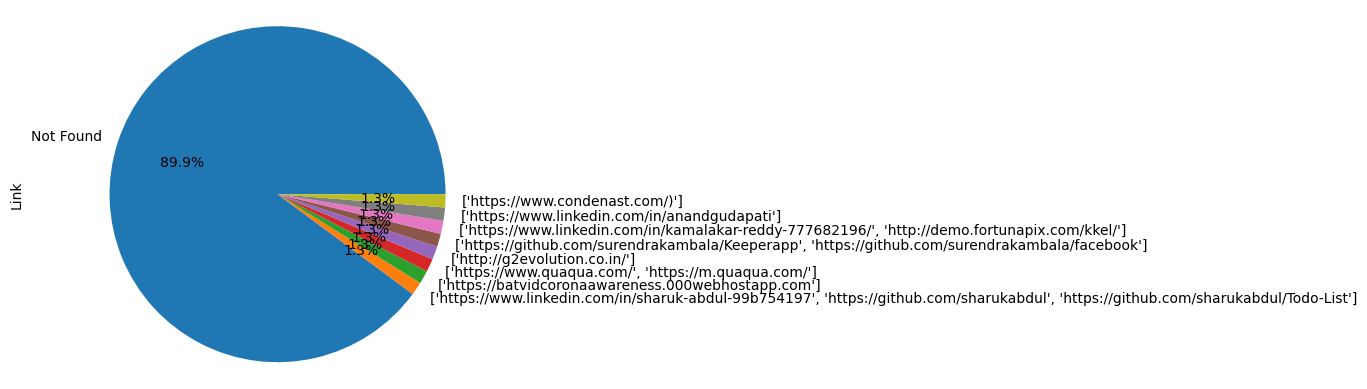

In [50]:
# Plot a pie chart
df['Link'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

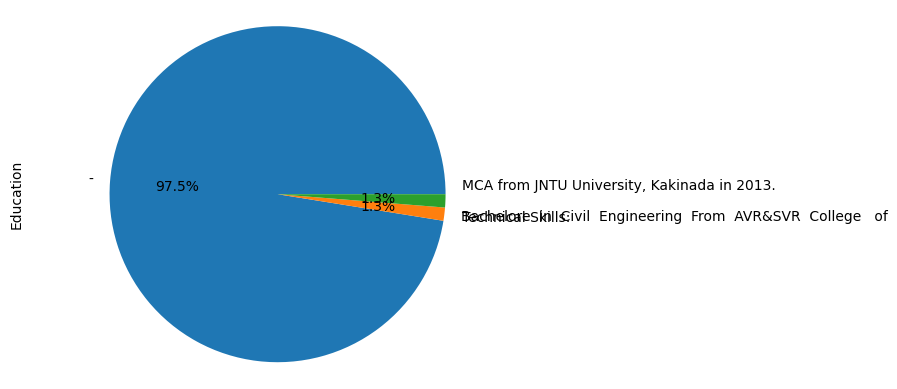

In [51]:
# Plot a pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

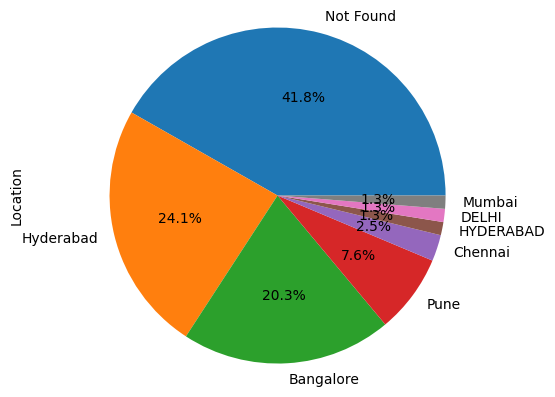

In [52]:
# Plot a pie chart
df['Location'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

In [53]:
df['Resume_Details'].head()

0    shaik abdul sharuk years experience wipro care...
1    mareedu lokesh babu professional overview arou...
2    developer react developer name krishna profess...
3    maryala vinay reddy professional summary years...
4    kanumuru deepak reddy career objective secure ...
Name: Resume_Details, dtype: object

Named Entity Recognition (NER)

In [54]:
import string
oneSetOfStopWords = set(nltk_stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('role', 142), ('oracle', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


Parts Of Speech (POS) Tagging

In [55]:
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

2023-06-15 06:09:03.623396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [56]:
for token in doc_block[:30]:
    print(token,token.pos_)

m VERB
main ADJ
project NOUN
cascaded VERB
two NUM
level NOUN
invertor NOUN
based VERB
multi ADJ
level NOUN
statcom X
high ADJ
power NOUN
appications NOUN
skills VERB
good ADJ
communication NOUN
skills NOUN
active ADJ
volunteering NOUN
extra ADJ
curricular ADJ
activities NOUN
team NOUN
player NOUN
appreciated VERB
clients NOUN
good ADJ
presentation NOUN
skills NOUN


Filtering out only the Nouns and Verbs from the Text to Tokens


In [57]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['years', 'career', 'challenging', 'pursuit', 'reputed', 'organization', 'utilize', 'skills', 'strengths', 'conjunction', 'goal', 'growth', 'profile', 'address', 'gmail', 'experience', 'associate', 'job', 'responsibilities', 'worked', 'auto', 'machine', 'waymo', 'self', 'driving', 'car', 'operating', 'vehicles', 'labelling', 'objects', 'test', 'time', 'scenario', 'captured', 'lidar', 'need', 'test', 'label', 'object', 'skills', 'end', 'react', 'bootstrap', 'material', 'frameworks', 'version', 'control', 'used', 'studio', 'code', 'operating', 'system', 'windows', 'end', 'react', 'bootstrap', 'material', 'frameworks', 'version', 'control', 'used', 'studio', 'code', 'operating', 'system', 'windows', 'projects', 'blog', 'application', 'react', 'list', 'built', 'react', 'list', 'app', 'built', 'react', 'app', 'built', 'following', 'features', 'user', 'add', 'mark', 'item', 'library', 'used', 'state', 'management', 'crosses', 'completion', 'education', 'tech', 'electronics', 'engineering', '

Counting all the Nouns and Verbs present in the Tokens of words

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

Words  Count
0    experience    540
1   application    417
2         using    384
3       workday    351
4       reports    326
5          data    307
6       project    290
7      business    260
8        server    243
9           web    237
10      process    233
11     database    232
12       worked    216
13    knowledge    199
14     involved    191

Visualizing the Result of Top 30 Nouns and Verbs most Frequently


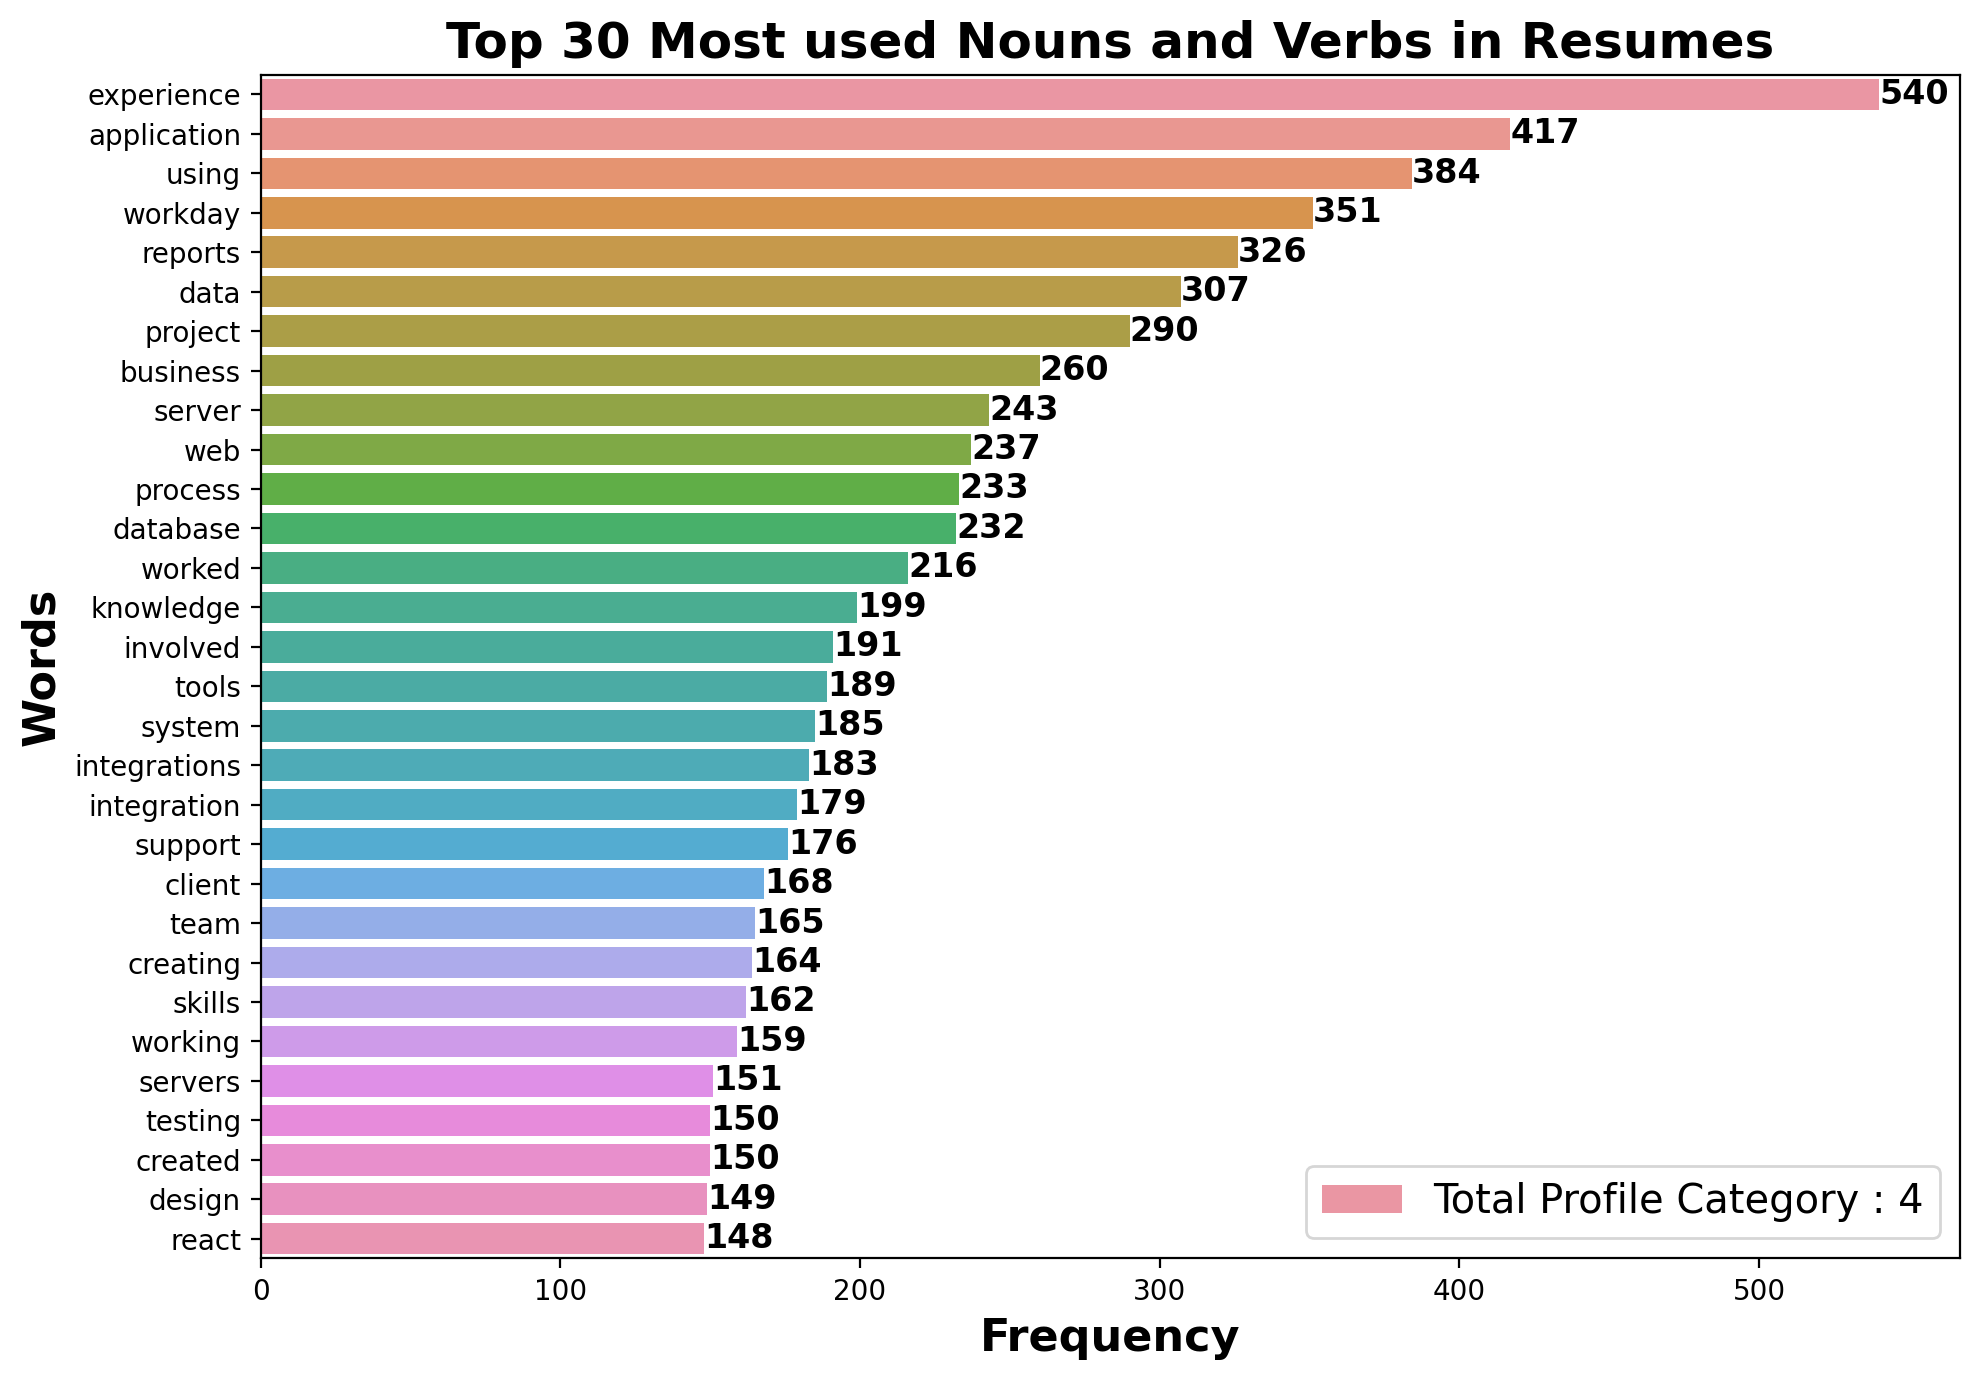

In [59]:
import seaborn as sns
from matplotlib import pylab
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(30), y= wd_df.Words.head(30), data= wd_df, ax = axe,
            label= 'Total Profile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 30 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/drive/MyDrive/Resumes/Top_Nouns_Verbs_Bar', dpi = 500)


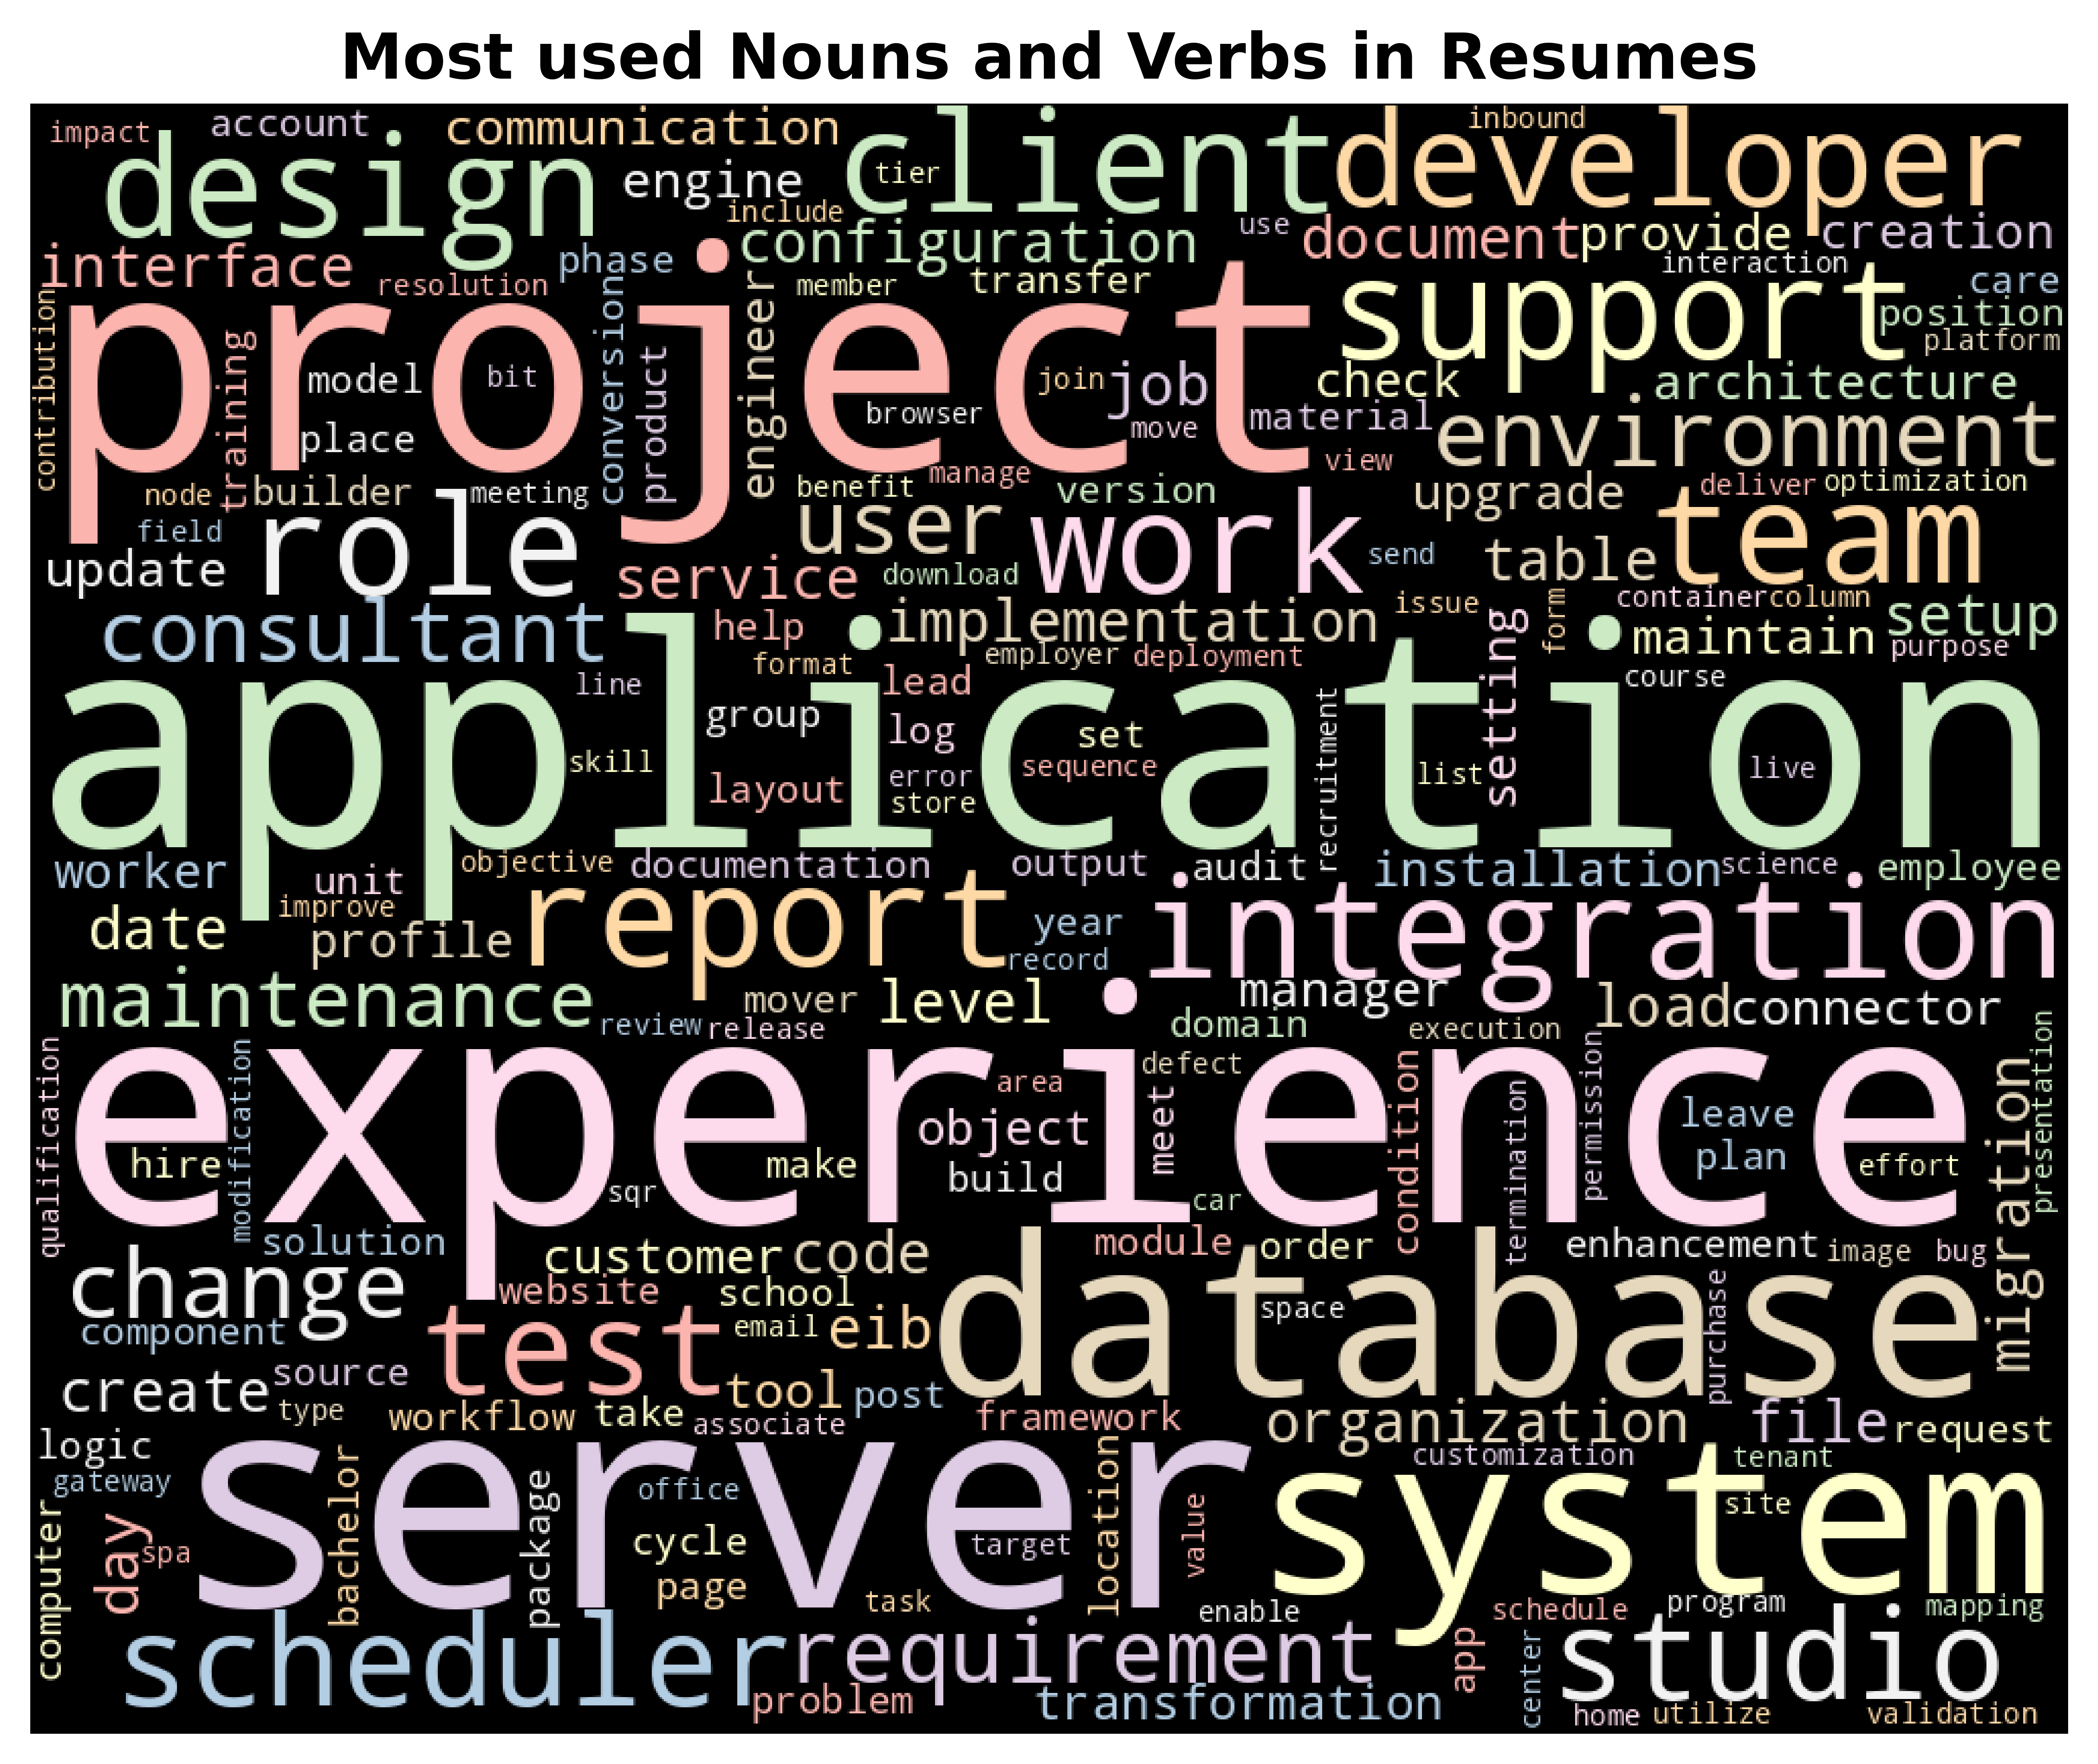

In [60]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
word_cloud.to_file('/content/drive/MyDrive/Resumes/Word_Clowds_Noun_Verb.png')
plt.show()

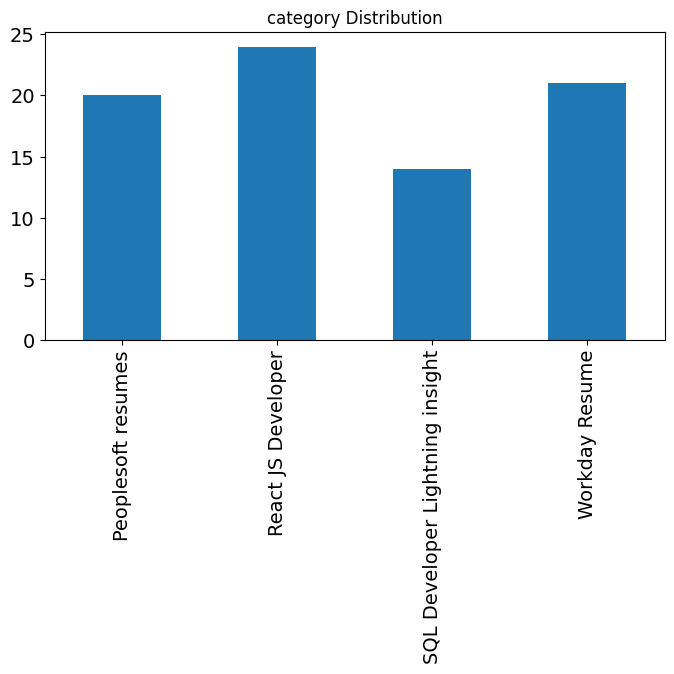

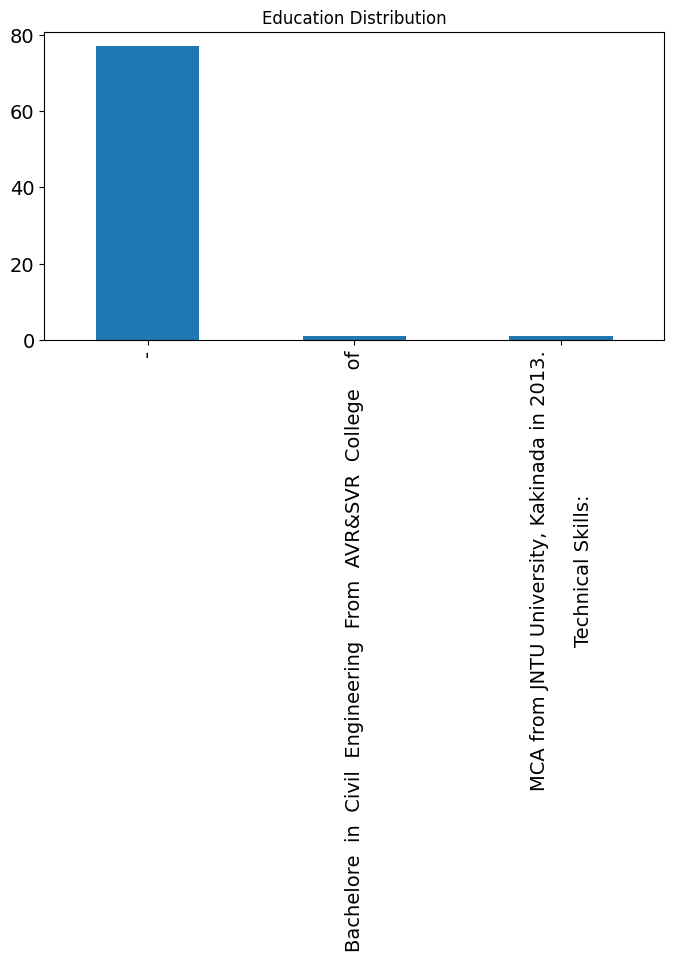

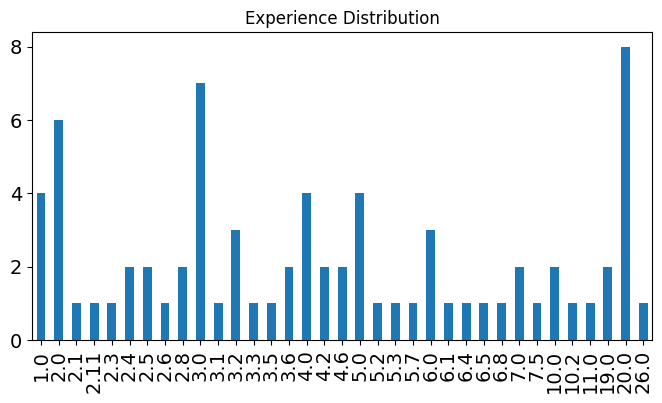

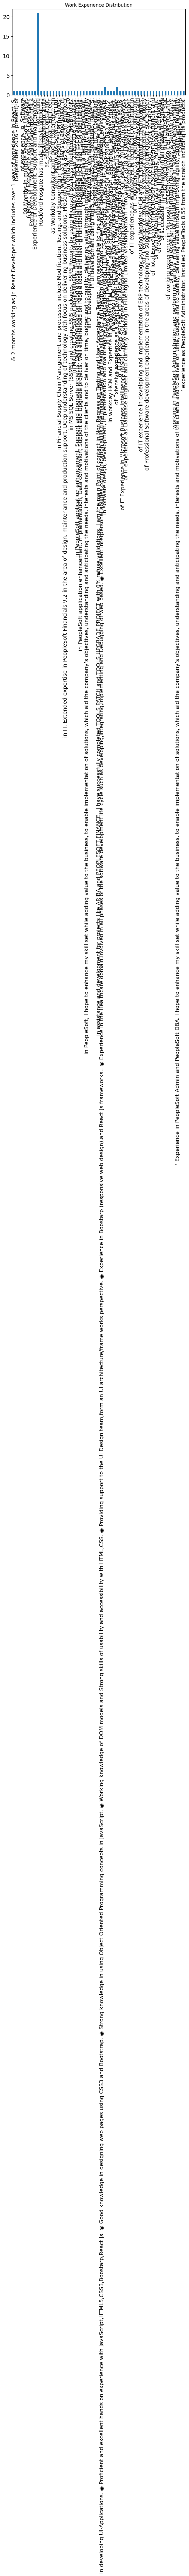

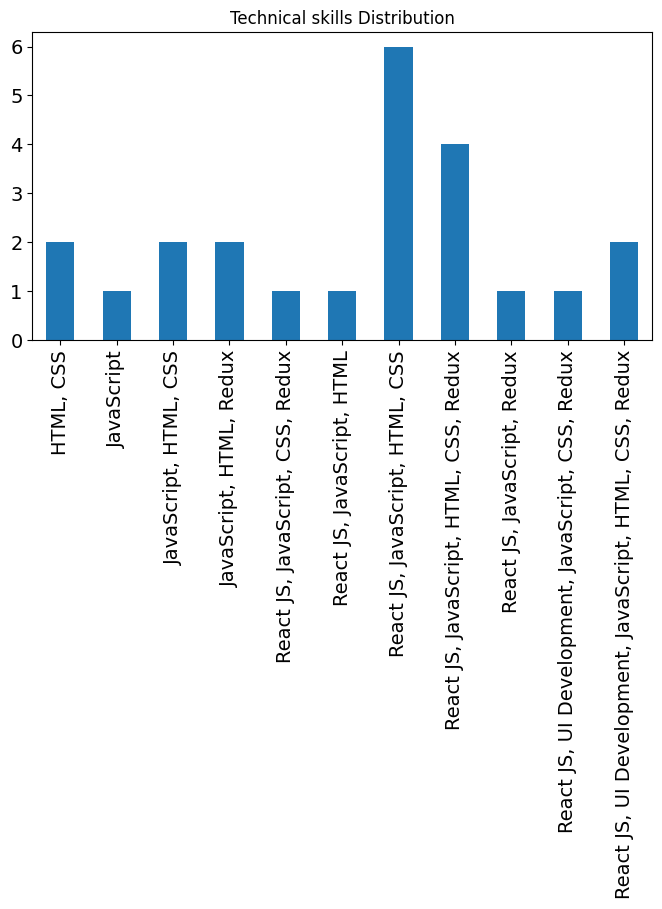

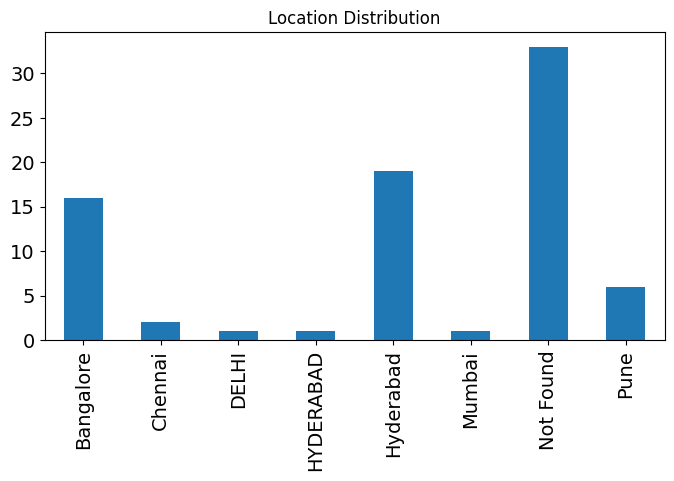

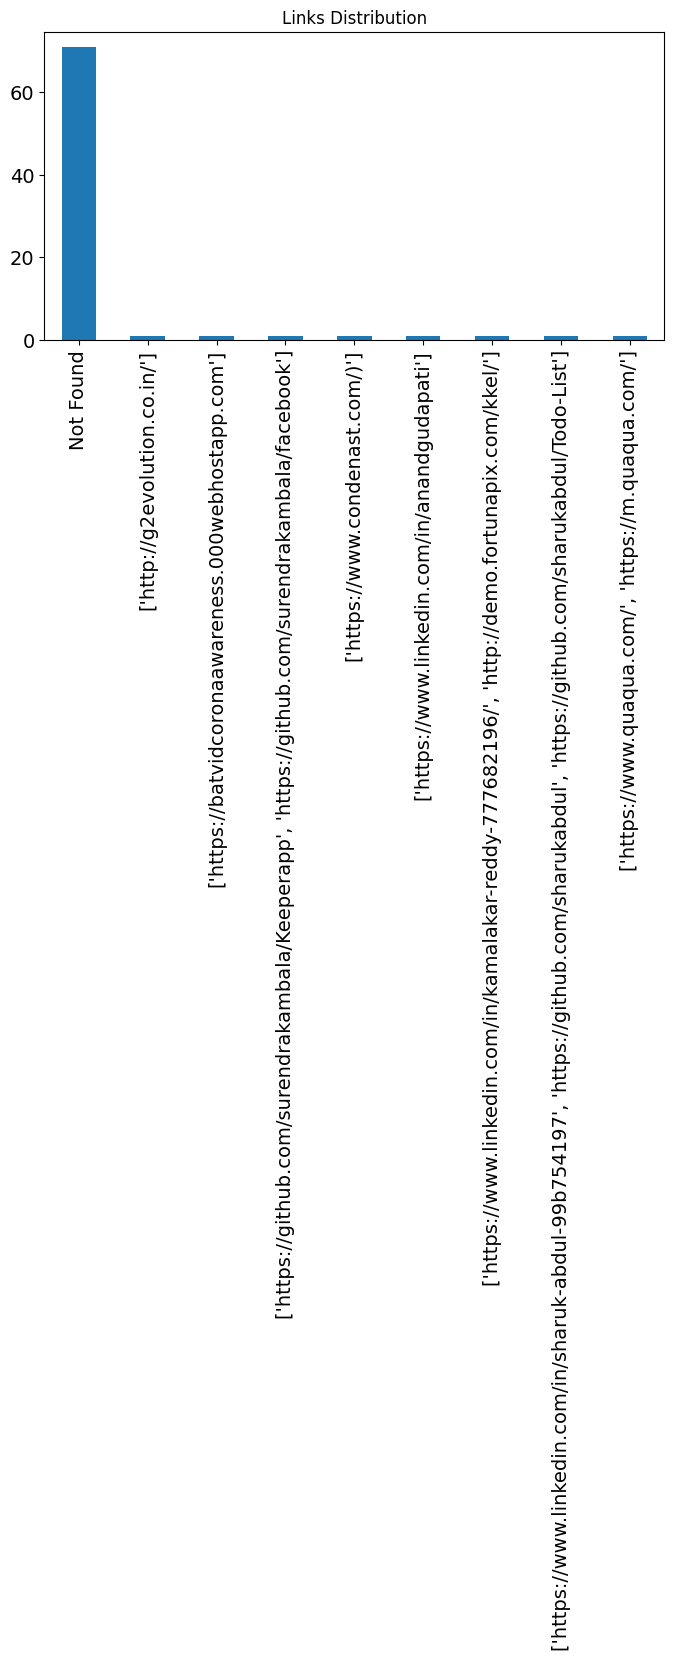

In [61]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("category Distribution")
plt.show()
df['Education'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Education Distribution")
plt.show()
df['Experience'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Experience Distribution")
plt.show()
df['Work Experience'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Work Experience Distribution")
plt.show()
df['Technical Skills'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Technical skills Distribution")
plt.show()
df['Location'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Location Distribution")
plt.show()
df['Link'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Links Distribution")
plt.show()


In [62]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_Details'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [63]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

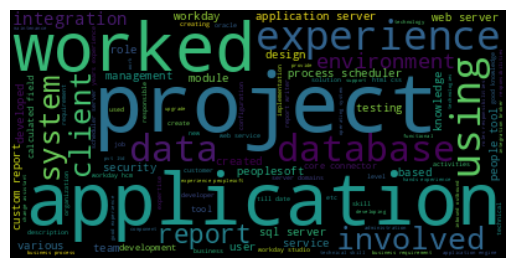

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the desired color map
WORDCLOUD_COLOR_MAP = 'tab10_r'

# Set the desired color map
plt.set_cmap(WORDCLOUD_COLOR_MAP)

# Generate the word cloud
text_data = df['Resume_Details'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud().generate(text_data)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [65]:
categories = np.sort(df['Category'].unique())
categories

array(['Peoplesoft resumes', 'React JS Developer',
       'SQL Developer Lightning insight', 'Workday Resume'], dtype=object)

In [66]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume_Details', 'Category']] for category in categories]
df_categories

[                                       Resume_Details            Category
 24  anubhav kumar singh core competencies scriptin...  Peoplesoft resumes
 25  classification internal classification interna...  Peoplesoft resumes
 26  tanna sujatha objective seeking challenging ro...  Peoplesoft resumes
 27  vinod akkala peoplesoft dba admin professional...  Peoplesoft resumes
 28  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft resumes
 29  peoplesoft admin peoplesoft dba ganesh alladi ...  Peoplesoft resumes
 30  peoplesoft administrator srinivas experience s...  Peoplesoft resumes
 31  peoplesoft administration vivekanand sayana ca...  Peoplesoft resumes
 32  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resumes
 33  arun venu experience summary experience years ...  Peoplesoft resumes
 34  personal details name pritam biswas date birth...  Peoplesoft resumes
 35  peoplesoft database administrator gangareddy p...  Peoplesoft resumes
 36  ahmed peoplesoft tec

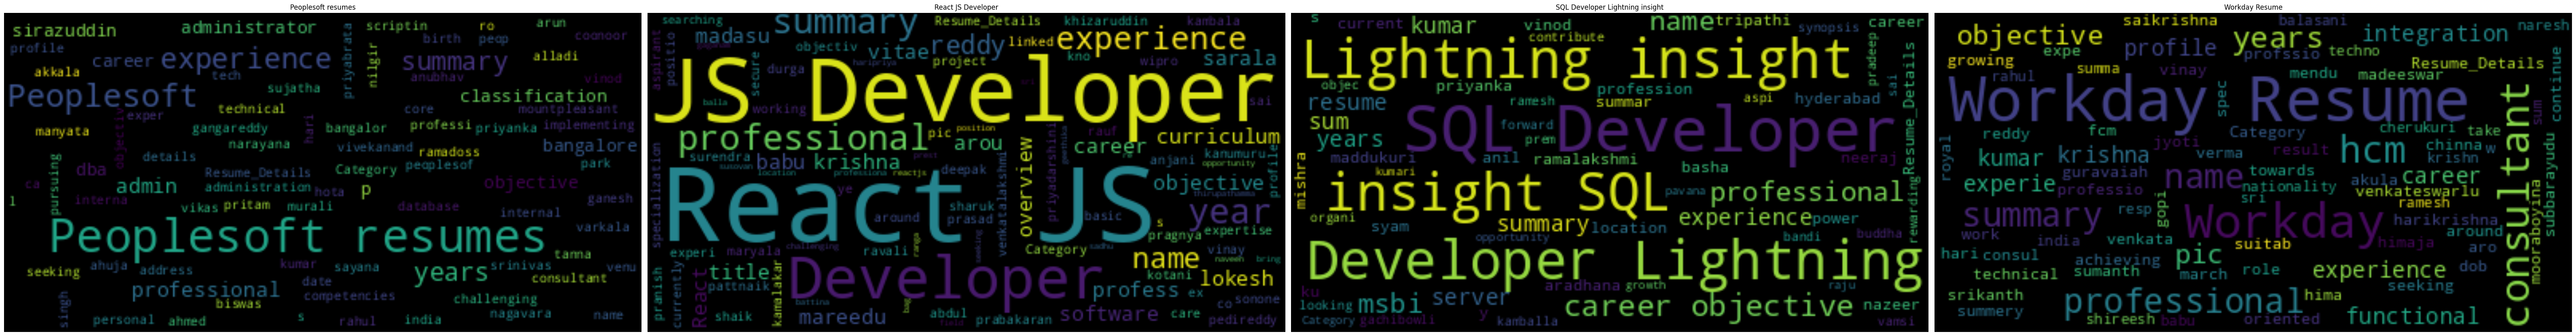

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(80, 60))

# Define the desired color map
WORDCLOUD_COLOR_MAP = 'tab10_r'

# Set the desired color map
plt.set_cmap(WORDCLOUD_COLOR_MAP)

# Generate word clouds for each category
for i, Category in enumerate(categories):
    wc_category = WordCloud().generate(str(df_categories[i]))

    plt.subplot(5, 5, i + 1).set_title(Category)
    plt.imshow(wc_category, interpolation='bilinear')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [68]:
def wordfreq(df):
    count = df['Resume_Details'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']
    return count.head(10)

In [69]:
word_frequency = wordfreq(df)
print(word_frequency)

          Word  Frequency
0   experience        598
1   peoplesoft        453
2      workday        431
3  application        418
4        using        395
5       server        359
6         data        332
7      reports        326
8      project        326
9          sql        280


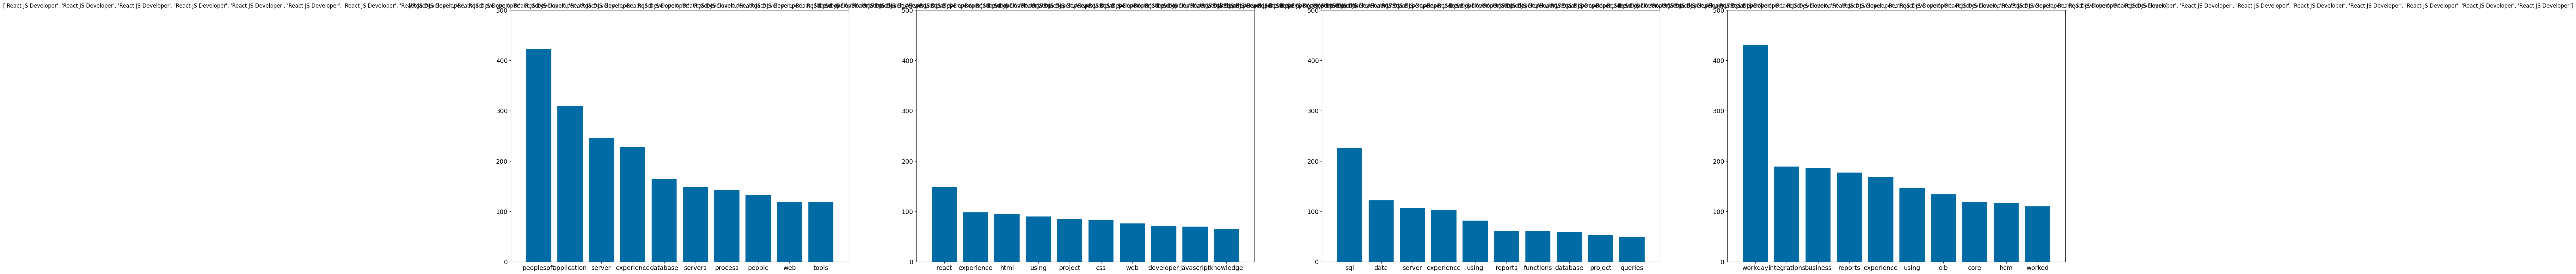

In [70]:
fig = plt.figure(figsize=(80, 60))

for i, Category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [71]:
df=pd.read_csv("/content/finalCleaned_Resumesnlp.csv")
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,8):
    df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
print(df)


    Category  Name  Education  Experience  Work Experience  Technical Skills  \
0          1    57          0           1               55                 8   
1          1    29          0           1               30                 6   
2          1    55          0          11               34                 7   
3          1    34          0           1               49                 3   
4          1    25          0          33               14                 7   
..       ...   ...        ...         ...              ...               ...   
74         3     4          0          18                8                11   
75         3    53          0          18                8                11   
76         3    68          0          18               32                11   
77         3    69          0          15               13                11   
78         3    15          0          29                2                11   

    Location  Link                     

<ipython-input-71-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
<ipython-input-71-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
<ipython-input-71-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

In [72]:
df

Category  Name  Education  Experience  Work Experience  Technical Skills  \
0          1    57          0           1               55                 8   
1          1    29          0           1               30                 6   
2          1    55          0          11               34                 7   
3          1    34          0           1               49                 3   
4          1    25          0          33               14                 7   
..       ...   ...        ...         ...              ...               ...   
74         3     4          0          18                8                11   
75         3    53          0          18                8                11   
76         3    68          0          18               32                11   
77         3    69          0          15               13                11   
78         3    15          0          29                2                11   

    Location  Link                                     Resume_Details  
0          6     7  shaik abdul sharuk years experience wipro care...  
1          6     0  mareedu lokesh babu professional overview arou...  
2          6     0  developer react developer name krishna profess...  
3          4     0  maryala vinay reddy professional summary years...  
4          6     0  kanumuru deepak reddy career objective secure ...  
..       ...   ...                                                ...  
74         0     0  name naresh babu cherukuri objective take resp...  
75         6     0  ramesh workday hcm consultant professional sum...  
76         6     0  workday hcm techno functional consultant rahul...  
77         6     0  workday integration consultant name sri krishn...  
78         4     0  shireesh balasani hcm consultant profile summa...  

[79 rows x 9 columns]

In [73]:
df.value_counts()

Category  Name  Education  Experience  Work Experience  Technical Skills  Location  Link  Resume_Details                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

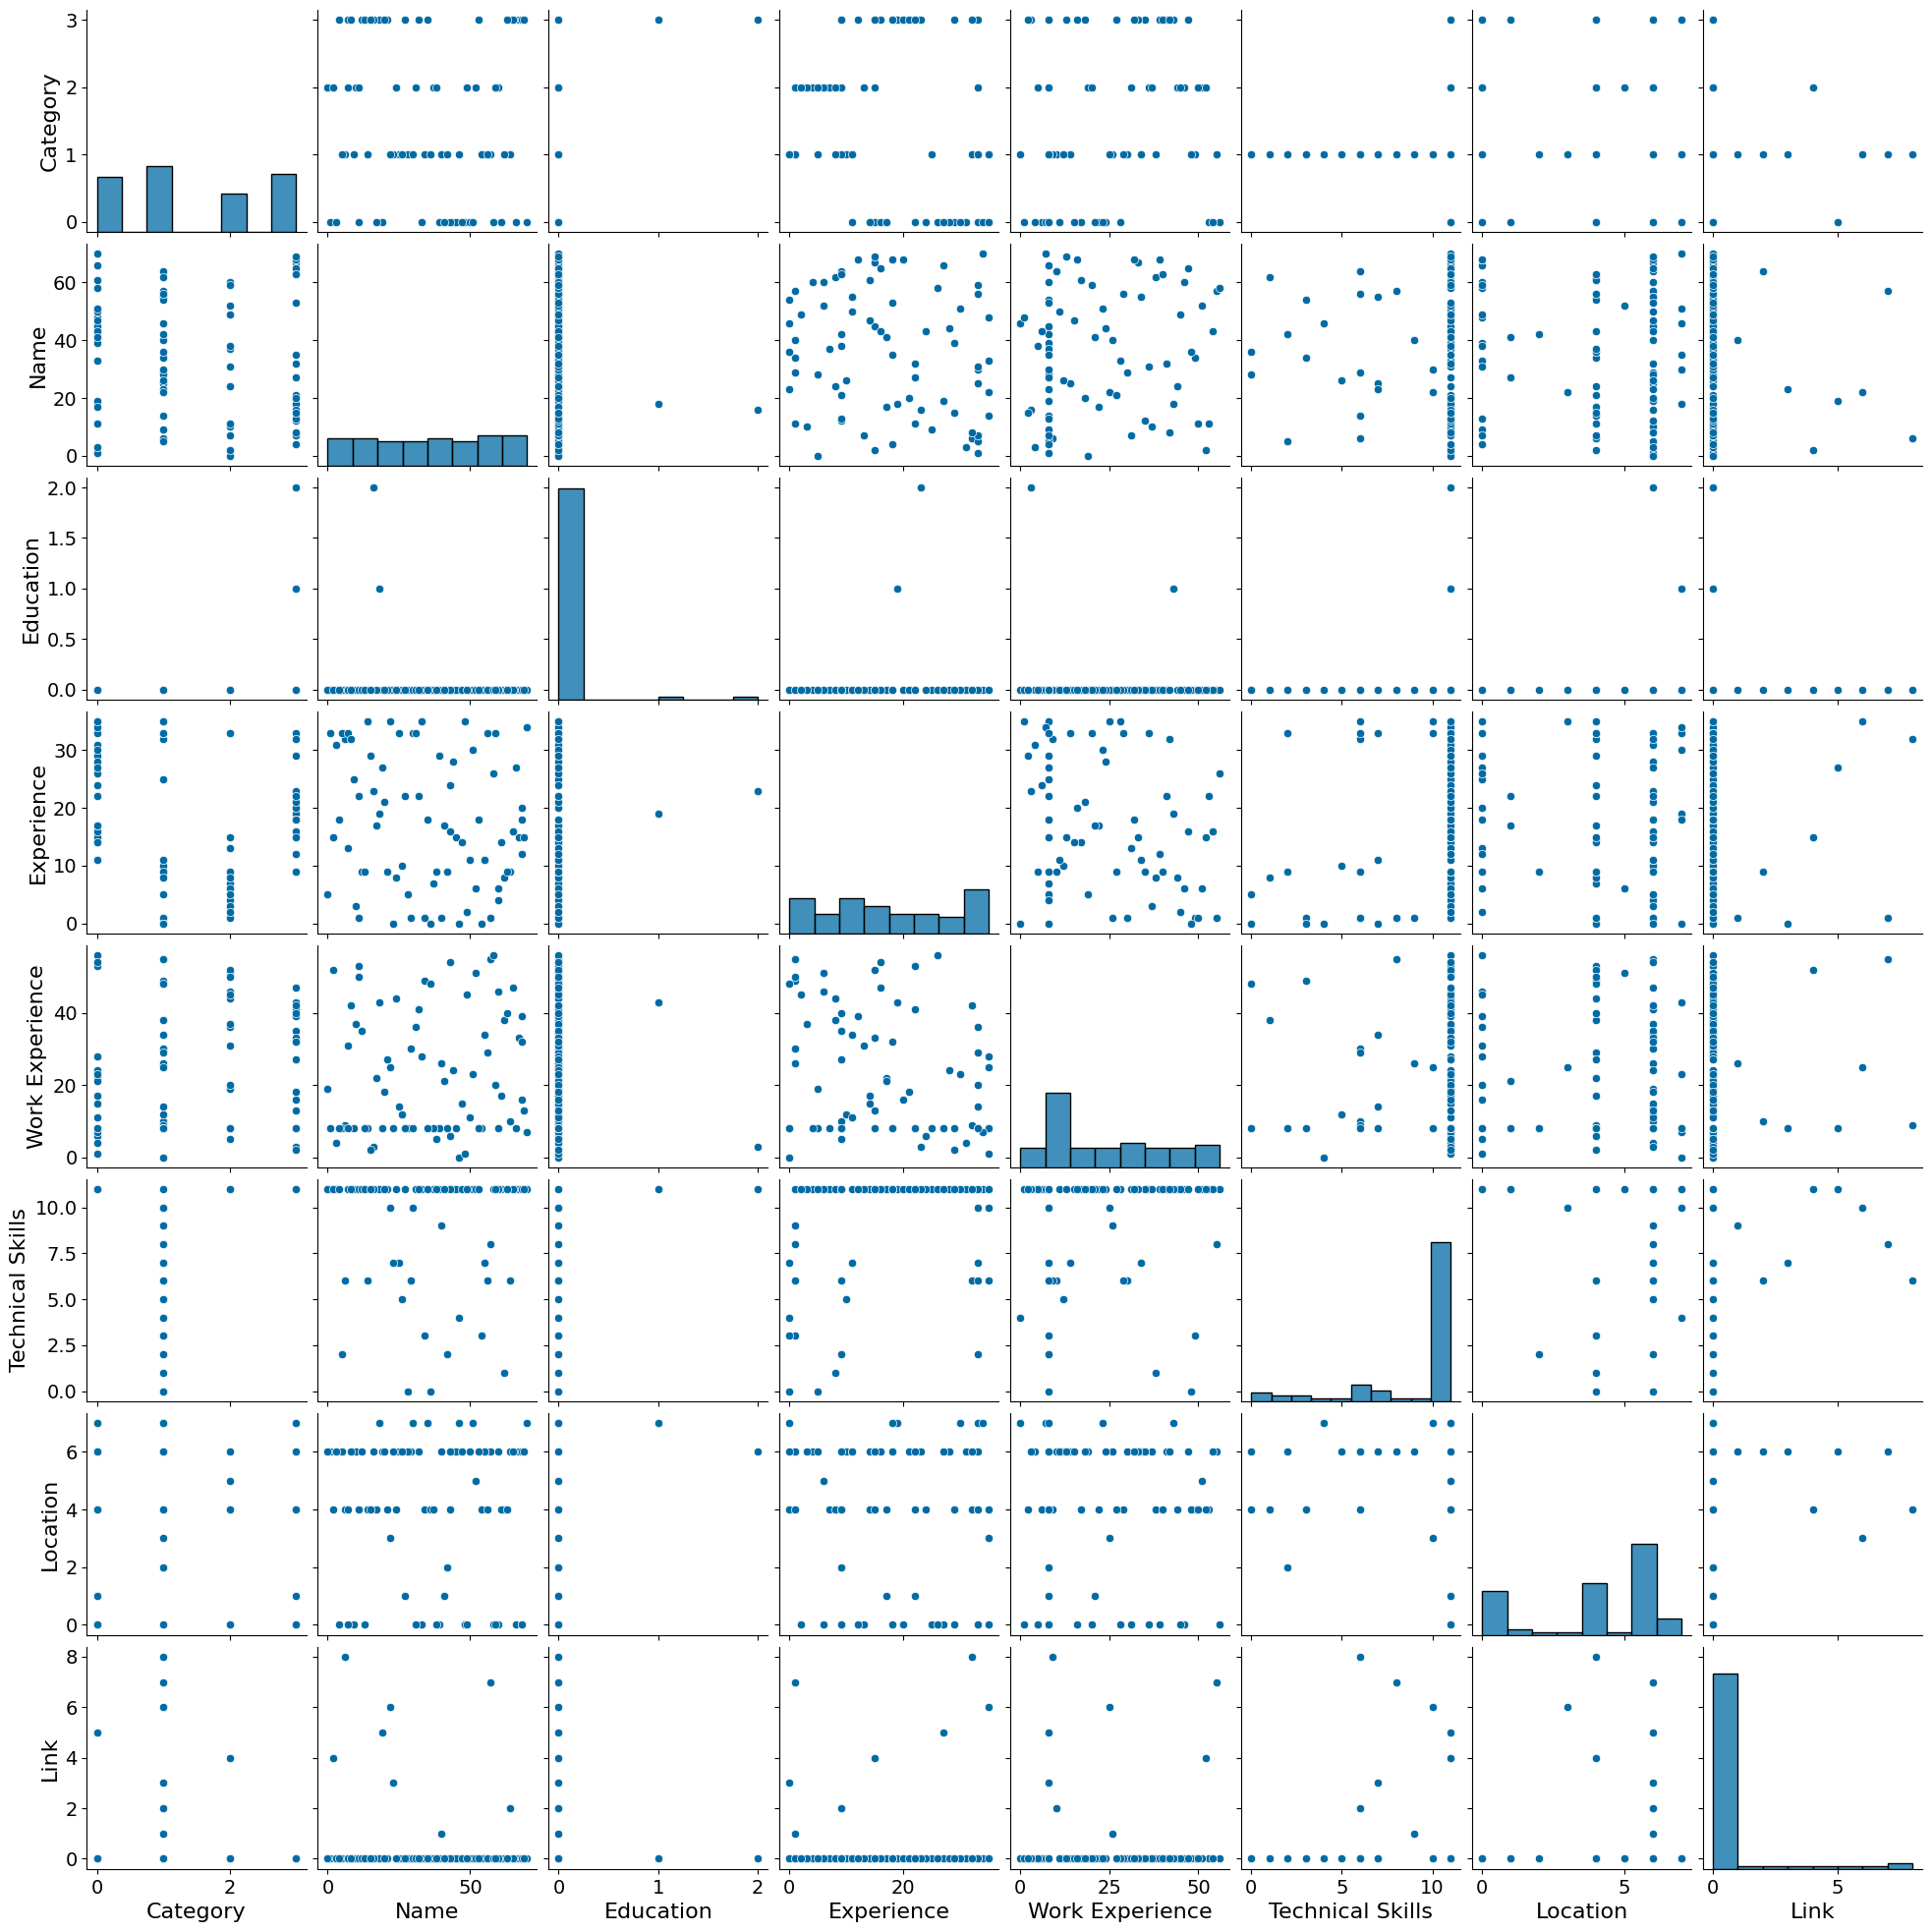

In [74]:
import seaborn as sns
sns.pairplot(data = df)

<Axes: xlabel='count', ylabel='Category'>

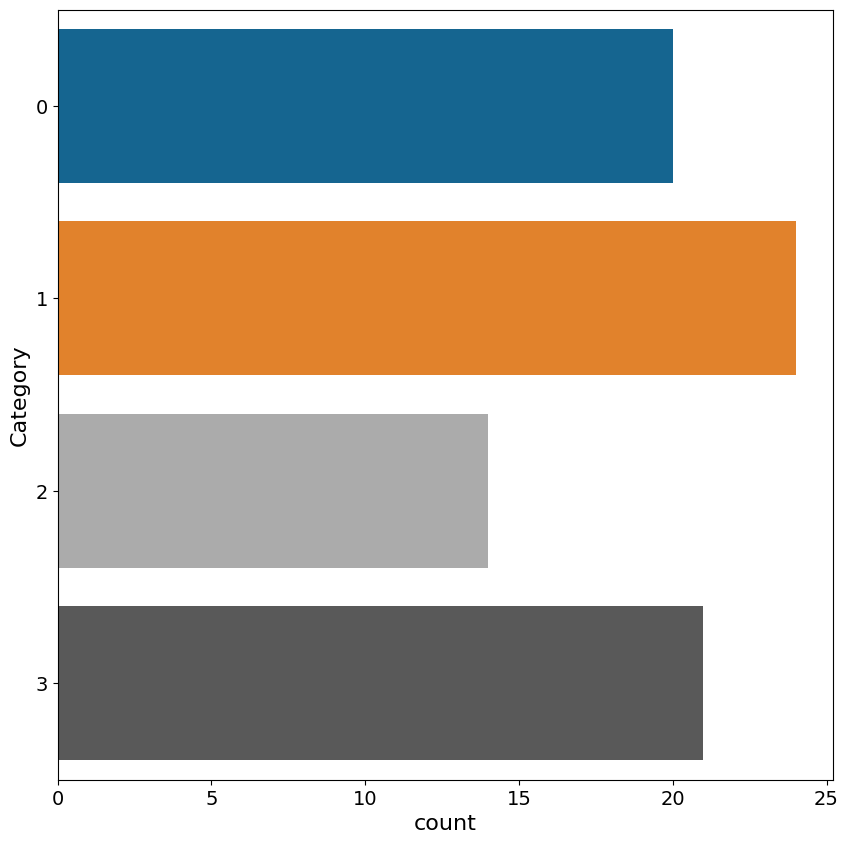

In [75]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [76]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [77]:
from nltk.stem import WordNetLemmatizer

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize words
def lemmatize_words(words):
    lem_words = [lemmatizer.lemmatize(word) for word in words]
    return lem_words

# Apply the lemmatization function to a list of words
words_list = df['Resume_Details']
lemmatized_words = lemmatize_words(words_list)
print(lemmatized_words)


['shaik abdul sharuk years experience wipro career objective challenging pursuit reputed organization utilize skills strengths conjunction common goal objective mutual growth linkedin profile github profile email address sharukabdul gmail com experience wipro mar feb senior associate job responsibilities worked auto machine waymo self driving car operating autonomous vehicles labelling objects test real time scenario captured lidar data per lidar data need test label object technical skills front end html css javascript react familiar bootstrap material frameworks version control system git github software used visual studio code operating system windows front end html css javascript react familiar bootstrap material frameworks version control system git github software used visual studio code operating system windows github projects blog application react list built react redux simple list app built react redux app built following features user add delete mark complete item redux libr

In [78]:

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
requiredText = df['Resume_Details'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")
WordFeatures

Feature completed .....


<79x4351 sparse matrix of type '<class 'numpy.float64'>'
	with 19463 stored elements in Compressed Sparse Row format>

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4351), (16, 4351))

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000

 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

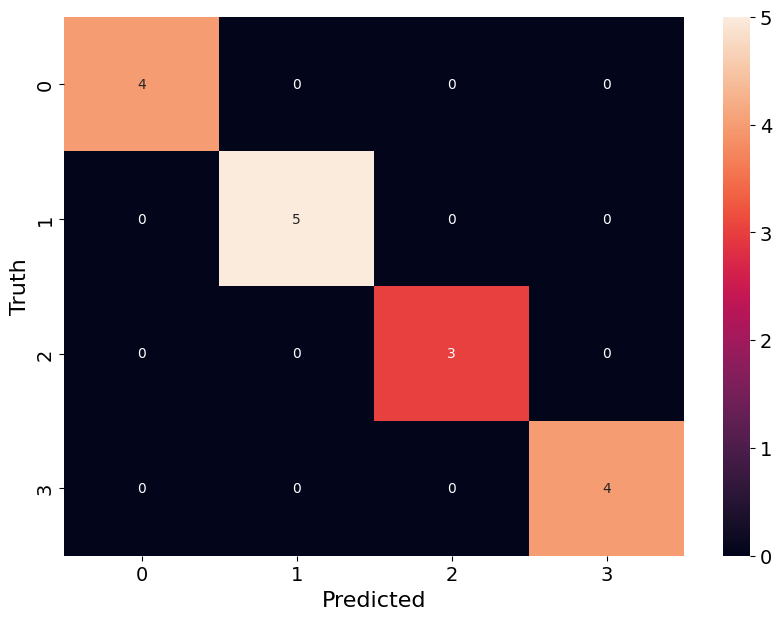

In [119]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn import metrics
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_1 )
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.9375

 Classification report for Support vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

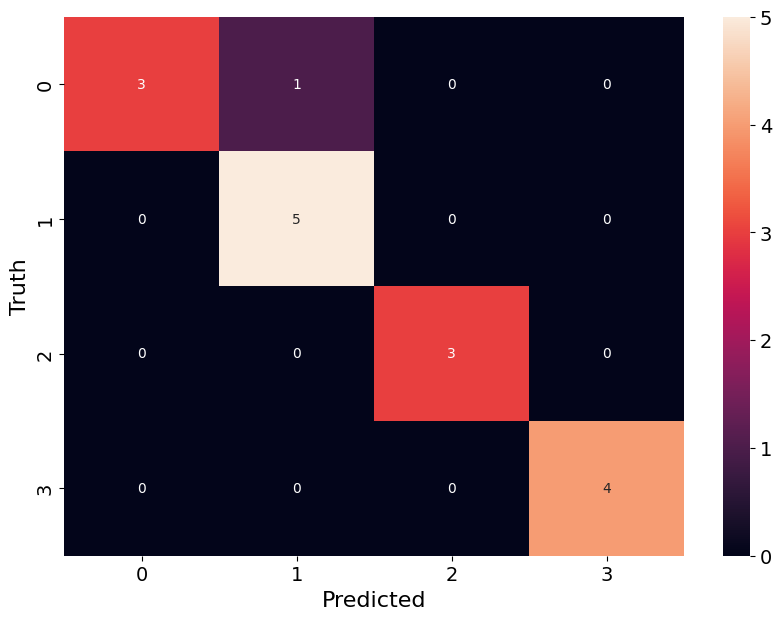

In [120]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))
print("\n Classification report for Support vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_2)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.9375

 Classification report for multinomialNB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16


Accuracy Score   :  0.9375
Precision Score  :  0.95
Recall Score     :  0.9167
f1-Score         :  0.9222
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 2 1]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

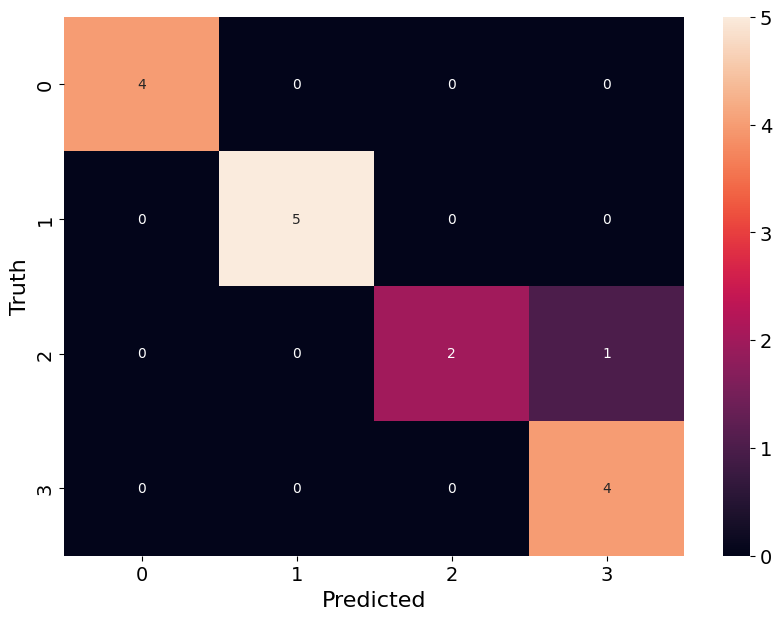

In [121]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))
print("\n Classification report for multinomialNB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))
accuracy_3= round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_3)
print('Precision Score  : ', precision_3)
print('Recall Score     : ', recall_3)
print('f1-Score         : ', f1_3)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_3))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_3)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9375

 Classification report for Logistic Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

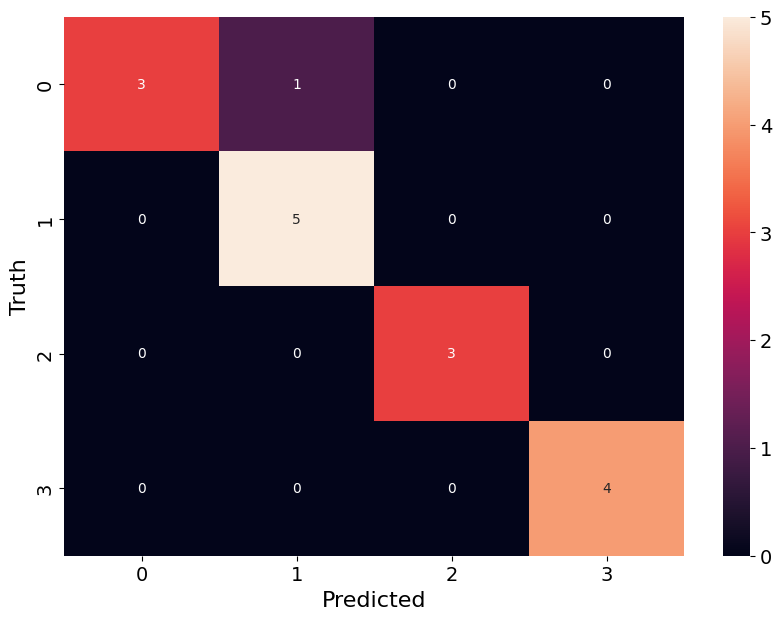

In [122]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))
print("\n Classification report for Logistic Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))
accuracy_4= round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_4)
print('Precision Score  : ', precision_4)
print('Recall Score     : ', recall_4)
print('f1-Score         : ', f1_4)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_4))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_4)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of AdaBoost Classifier on training set: 1.0000
Accuracy of AdaBoost Classifier on test set    : 0.9375

 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

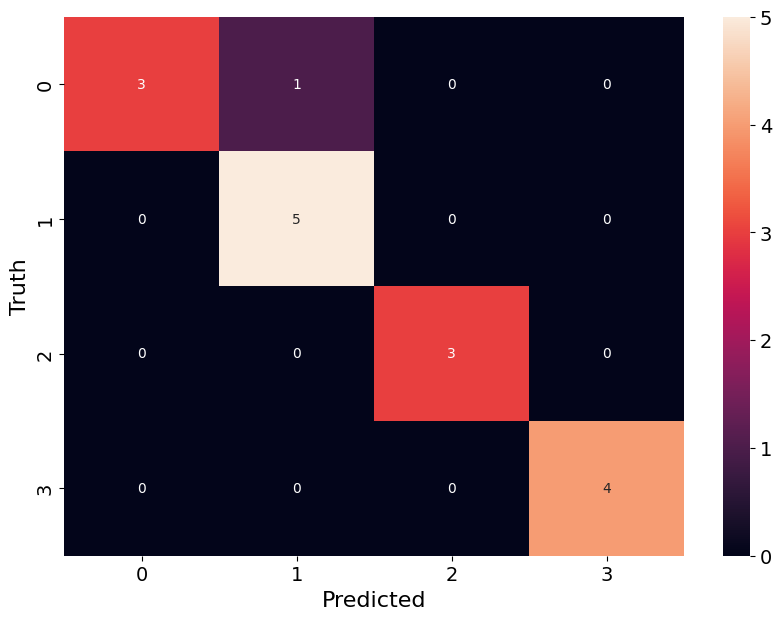

In [123]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))
accuracy_5= round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5= round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_5)
print('Precision Score  : ', precision_5)
print('Recall Score     : ', recall_5)
print('f1-Score         : ', f1_5)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_5))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_5)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 0.8750

 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      0.80      0.80         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.88        16
weighted avg       0.89      0.88      0.88        16


Accuracy Score   :  0.875
Precision Score  :  0.8875
Recall Score     :  0.8875
f1-Score         :  0.8786
Confusion Matrix :
 [[3 1 0 0]
 [0 4 1 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

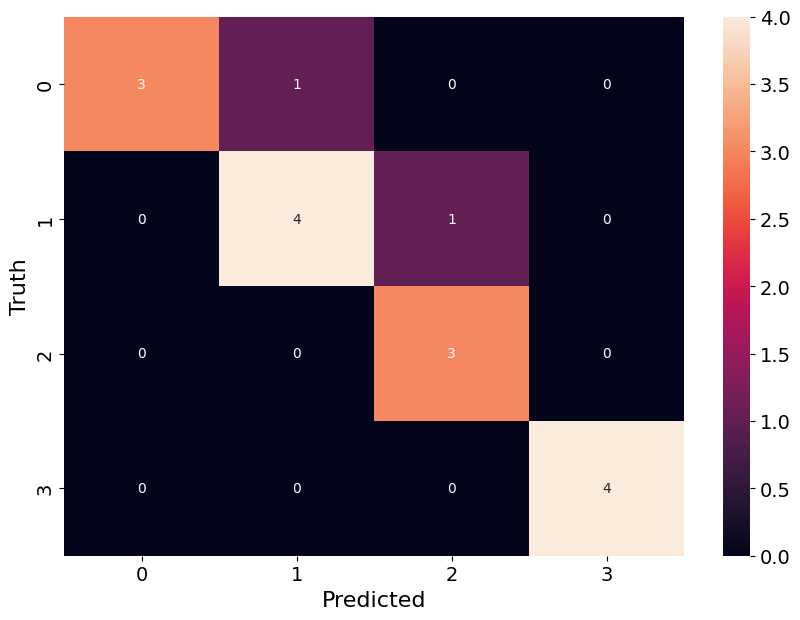

In [124]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))
accuracy_6= round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6= round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_6)
print('Precision Score  : ', precision_6)
print('Recall Score     : ', recall_6)
print('f1-Score         : ', f1_6)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_6))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_6)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.9375

 Classification report for GradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16


Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9375
f1-Score         :  0.9416
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

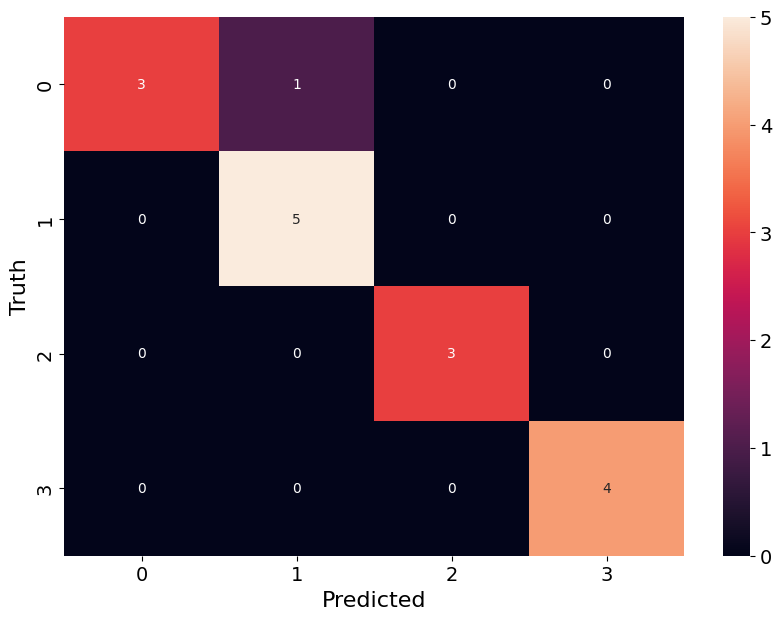

In [125]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_7 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_7)))
accuracy_7= round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7= round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_7)
print('Precision Score  : ', precision_7)
print('Recall Score     : ', recall_7)
print('f1-Score         : ', f1_7)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_7))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_7)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Bagging Classifier Classifier on training set: 1.0000
Accuracy of Bagging Classifier Classifier on test set    : 1.0000

 Classification report for Bagging Classifier BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=8):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

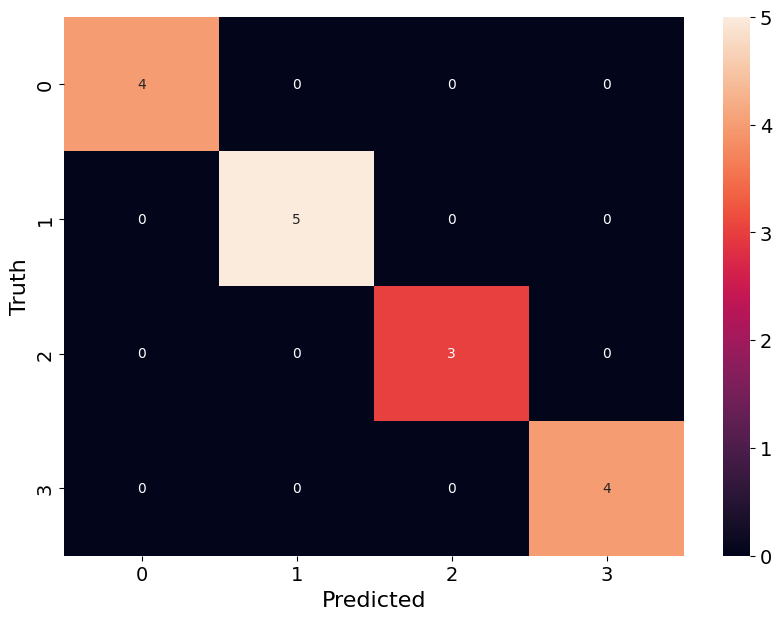

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
bg_clf = BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=8)
bg_clf.fit(X_train , y_train)
#Predict for X test dataset
prediction_8 = bg_clf.predict(X_test)
print('Accuracy of Bagging Classifier Classifier on training set: {:.4f}'.format(bg_clf.score(X_train, y_train)))
print('Accuracy of Bagging Classifier Classifier on test set    : {:.4f}'.format(bg_clf.score(X_test, y_test)))
print("\n Classification report for Bagging Classifier %s:\n%s\n" % (bg_clf, metrics.classification_report(y_test, prediction_8)))
accuracy_8= round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8= round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_8)
print('Precision Score  : ', precision_8)
print('Recall Score     : ', recall_8)
print('f1-Score         : ', f1_8)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_8))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_8)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

0.9523809523809523
Accuracy of knn Classifier Classifier on training set: 1.0000
Accuracy of knn Classifier Classifier on test set    : 1.0000

 Classification report for knn Classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

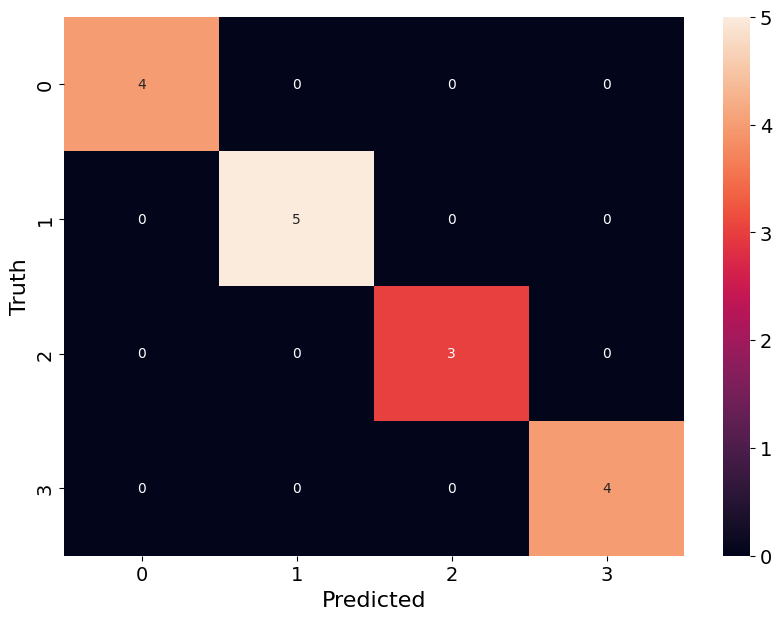

In [127]:
#KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
kfold = KFold(n_splits=10)
knn_clf= KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2)
results = cross_val_score(knn_clf, X_train, y_train, cv=kfold)
print(results.mean())
knn_clf.fit(X_train , y_train)
prediction_9=knn_clf.predict(X_test)
print('Accuracy of knn Classifier Classifier on training set: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Accuracy of knn Classifier Classifier on test set    : {:.4f}'.format(knn_clf.score(X_test, y_test)))
print("\n Classification report for knn Classifier %s:\n%s\n" % (knn_clf, metrics.classification_report(y_test, prediction_9)))
accuracy_9= round(accuracy_score(y_test,prediction_9),4)
precision_9 = round(precision_score(y_test,prediction_9,average = 'macro'),4)
recall_9= round(recall_score(y_test,prediction_9, average = 'macro'),4)
f1_9= round(f1_score(y_test,prediction_9, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_9)
print('Precision Score  : ', precision_9)
print('Recall Score     : ', recall_9)
print('f1-Score         : ', f1_9)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_9))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_9)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Accuracy of extreme GradientBoosting Classifier on training set: 1.0000
Accuracy of extreme GradientBoosting Classifier on test set    : 0.8750

 Classification report for extremeGradientBoosting Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
              precision    reca

Text(90.72222222222221, 0.5, 'Truth')

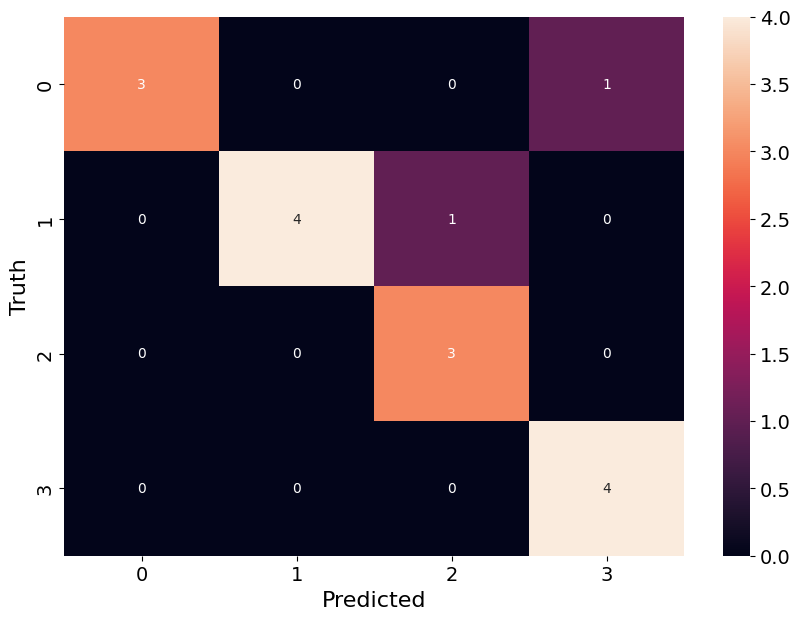

In [129]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_10 = xgb_clf.predict(X_test)
print('Accuracy of extreme GradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of extreme GradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))
print("\n Classification report for extremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_10)))
accuracy_10= round(accuracy_score(y_test,prediction_10),4)
precision_10= round(precision_score(y_test,prediction_10,average = 'macro'),4)
recall_10= round(recall_score(y_test,prediction_10, average = 'macro'),4)
f1_10 = round(f1_score(y_test,prediction_10, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_10)
print('Precision Score  : ', precision_10)
print('Recall Score     : ', recall_10)
print('f1-Score         : ', f1_10)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_10))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_10)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [130]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier','Bagging Classifier','knn Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8,accuracy_9,accuracy_10], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8,precision_9,precision_10], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8,recall_9,recall_10], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8,f1_9,f1_10]}
table = pd.DataFrame(table)
table

Classifier  Accuracy Score  Precision Score  \
0             Random Forest Classifier          1.0000           1.0000   
1                       SVM Classifier          0.9375           0.9583   
2            Multinomial NB Classifier          0.9375           0.9500   
3                  Logistic Regression          0.9375           0.9583   
4                  AdaBoost Classifier          0.9375           0.9583   
5         Gradient Boosting Classifier          0.8750           0.8875   
6  Xtreme Gradient Boosting Classifier          0.9375           0.9583   
7   Light Gradient Boosting Classifier          1.0000           1.0000   
8                   Bagging Classifier          1.0000           1.0000   
9                       knn Classifier          0.8750           0.8875   

   Recall Score  f1-Score  
0        1.0000    1.0000  
1        0.9375    0.9416  
2        0.9167    0.9222  
3        0.9375    0.9416  
4        0.9375    0.9416  
5        0.8875    0.8786  
6        0.9375    0.9416  
7        1.0000    1.0000  
8        1.0000    1.0000  
9        0.8875    0.8730